In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 8)

# Files

The data for every player was obtained from basketball-reference.com. It was quite difficult to find players who had children with a known birthdate during the timeframe of Late November to Mid-Late March since the analysis observed the month before a player's child's birth and the month after. Because of the difficulty I had to turn the clock back to earlier than I would have liked starting in the year 2000.

In [129]:
howard = pd.read_csv('d_howard.csv')
howard.name = 'Howard'
melo = pd.read_csv('c_anthony.csv')
melo.name = 'Melo'
kobe = pd.read_csv('k_bryant.csv')
kobe.name = 'Kobe'
roy = pd.read_csv('b_roy.csv')
roy.name = 'Roy'
dirk = pd.read_csv('d_nowitzki.csv')
dirk.name = 'Dirk'
allen = pd.read_csv('r_allen.csv')
allen.name = 'Allen'
horford = pd.read_csv('a_horford.csv')
horford.name = 'Horford'
tmac = pd.read_csv('t_mac.csv')
tmac.name = 'TMac'
shaq = pd.read_csv('s_oneal.csv')
shaq.name = 'Shaq'
andre = pd.read_csv('a_iguodala.csv')
andre.name = 'Andre'

howard_birth = '11/18/2007'
roy_birth = '3/27/2007'
andre_birth = '3/24/2007'
tmac_birth = '1/23/2003'
shaq_birth = '1/11/2000'
allen_birth = '1/25/2012'
kobe_birth = '1/19/2003'
dirk_birth = '3/23/2015'
horford_birth = '2/23/2015'
melo_birth = '3/7/2007'

In [35]:
players = [howard, melo, kobe, roy, dirk, allen, horford, tmac, shaq, andre]

for player in players:
    print(str(player.name) + ': ' + str(player.shape))

Howard: (82, 30)
Melo: (65, 30)
Kobe: (82, 30)
Roy: (57, 30)
Dirk: (82, 30)
Allen: (46, 30)
Horford: (82, 30)
TMac: (75, 30)
Shaq: (74, 30)
Andre: (76, 30)


In [36]:
howard

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1,2007-10-31,21-327,ORL,NaN,MIL,W (+19),1,30:34,...,11,12,2,0,7,4,2,16,16.0,28
1,2,2,2007-11-02,21-329,ORL,NaN,DET,L (-24),1,37:53,...,10,13,1,0,1,2,5,16,8.4,-13
2,3,3,2007-11-03,21-330,ORL,@,WAS,W (+12),1,37:23,...,11,15,2,0,3,3,4,17,16.3,22
3,4,4,2007-11-06,21-333,ORL,@,MIN,W (+8),1,39:01,...,11,16,1,1,0,0,2,28,28.9,17
4,5,5,2007-11-07,21-334,ORL,@,TOR,W (+9),1,33:52,...,8,9,2,1,1,4,5,17,10.4,12
5,6,6,2007-11-09,21-336,ORL,@,NYK,W (+10),1,36:48,...,17,20,1,1,3,3,4,22,19.6,8
6,7,7,2007-11-10,21-337,ORL,NaN,PHO,L (-10),1,42:21,...,11,18,3,0,1,4,2,33,24.0,-12
7,8,8,2007-11-13,21-340,ORL,NaN,SEA,W (+27),1,27:19,...,10,12,2,0,3,4,2,13,10.5,19
8,9,9,2007-11-14,21-341,ORL,@,CLE,W (+1),1,48:54,...,10,16,2,0,4,3,3,35,33.5,-1
9,10,10,2007-11-16,21-343,ORL,@,NJN,W (+25),1,36:41,...,14,19,0,0,1,4,5,21,16.3,18


# Convert File into Analytical Format

With each file being loaded into a pandas dataframe I created a function that utilizes pandas functionality along with python's datetime module including converting strings into datetime objects and timedelta. The function below converts the Date column of the dataframe into datetime objects, it then converts the string birth_date objects created earlier into datetime objects and creates a new column in the dataframe by subtracting the date of birth from each Date in the column. I then sliced the dataframe to include only the 30 days before and after the date of birth and removed all instances where there were DNPs.

In [131]:
from datetime import datetime, timedelta

def final_format(df, birth_date):
    df['Date'] = pd.to_datetime(df['Date']) # convert date column to datetime
    df['time_since_birth'] = datetime.strptime(birth_date, '%m/%d/%Y') - pd.to_datetime(df['Date']) # calculate time since birth
    final_df = df[(df['time_since_birth'] <= timedelta(days=30)) &  # Only include month before and after birth
                  (df['time_since_birth'] >= timedelta(days=-30))] 
    final_df = final_df[final_df['G'].notnull()] # remove DNPs
    return final_df

In [185]:
final_howard = final_format(howard, howard_birth)
final_allen = final_format(allen, allen_birth)
final_tmac = final_format(tmac, tmac_birth)
final_kobe = final_format(kobe, kobe_birth)
final_horford = final_format(horford, horford_birth)
final_dirk = final_format(dirk, dirk_birth)
final_melo = final_format(melo, melo_birth)
final_andre = final_format(andre, andre_birth)
final_shaq = final_format(shaq, shaq_birth)
final_roy = final_format(roy, roy_birth)

In [59]:
final_howard

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,time_since_birth
0,1,1,2007-10-31,21-327,ORL,NaN,MIL,W (+19),1,30:34,...,12,2,0,7,4,2,16,16.0,28,18 days
1,2,2,2007-11-02,21-329,ORL,NaN,DET,L (-24),1,37:53,...,13,1,0,1,2,5,16,8.4,-13,16 days
2,3,3,2007-11-03,21-330,ORL,@,WAS,W (+12),1,37:23,...,15,2,0,3,3,4,17,16.3,22,15 days
3,4,4,2007-11-06,21-333,ORL,@,MIN,W (+8),1,39:01,...,16,1,1,0,0,2,28,28.9,17,12 days
4,5,5,2007-11-07,21-334,ORL,@,TOR,W (+9),1,33:52,...,9,2,1,1,4,5,17,10.4,12,11 days
5,6,6,2007-11-09,21-336,ORL,@,NYK,W (+10),1,36:48,...,20,1,1,3,3,4,22,19.6,8,9 days
6,7,7,2007-11-10,21-337,ORL,NaN,PHO,L (-10),1,42:21,...,18,3,0,1,4,2,33,24.0,-12,8 days
7,8,8,2007-11-13,21-340,ORL,NaN,SEA,W (+27),1,27:19,...,12,2,0,3,4,2,13,10.5,19,5 days
8,9,9,2007-11-14,21-341,ORL,@,CLE,W (+1),1,48:54,...,16,2,0,4,3,3,35,33.5,-1,4 days
9,10,10,2007-11-16,21-343,ORL,@,NJN,W (+25),1,36:41,...,19,0,0,1,4,5,21,16.3,18,2 days


In [62]:
final_kobe

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,time_since_birth
27,28,28,2002-12-20,24-119,LAL,@,PHI,L (-3),1,52:00,...,4,10,1,2,5,4,44,29.9,-4,30 days
28,29,29,2002-12-22,24-121,LAL,@,TOR,W (+2),1,46:00,...,2,5,2,1,5,3,31,17.7,4,28 days
29,30,30,2002-12-25,24-124,LAL,NaN,SAC,L (-6),1,46:00,...,15,6,2,1,6,3,27,18.4,-3,25 days
30,31,31,2002-12-28,24-127,LAL,@,DEN,W (+19),1,35:00,...,6,6,2,0,4,3,39,29.6,16,22 days
31,32,32,2002-12-29,24-128,LAL,NaN,TOR,W (+16),1,35:00,...,9,12,2,1,3,3,13,14.5,4,21 days
32,33,33,2003-01-04,24-134,LAL,@,PHO,L (-14),1,42:00,...,7,7,4,2,2,3,37,29.0,-9,15 days
33,34,34,2003-01-05,24-135,LAL,NaN,PHO,W (+12),1,46:00,...,12,7,2,1,1,1,31,26.1,14,14 days
34,35,35,2003-01-07,24-137,LAL,NaN,SEA,W (+21),1,37:00,...,3,3,1,1,2,2,45,33.7,19,12 days
35,36,36,2003-01-10,24-140,LAL,NaN,CLE,W (+16),1,34:00,...,10,11,4,1,5,2,21,25.0,25,9 days
36,37,37,2003-01-12,24-142,LAL,NaN,MIA,W (+25),1,38:00,...,3,4,4,0,4,1,36,29.4,23,7 days


# Comparison Plots

The function below takes in 4 parameters including the dataframe in proper format, the player name, the child's name, and the position of the player. The important parameters here are the dataframe and the position - both names are simply used for plot labeling. For each dataframe the function displays two plots - plotting the points before and after the date of birth and a player's game score before and after the date of birth. The game score is a metric describing the complete game of a player defined by John Hollinger. The Game Score formula is PTS + 0.4 * FG - 0.7 * FGA - 0.4*(FTA - FT) + 0.7 * ORB + 0.3 * DRB + STL + 0.7 * AST + 0.7 * BLK - 0.4 * PF - TOV.

The third plot displayed for the player is either the FG% if the position is 'G', or rebounds if the position is 'F'. I defined F as a powerforward or center where rebounding is a large facet of their game and G as a guard or a forward that doesn't rebound as much and is score-first type of player.

In [145]:
def player_plots(df, player_name, child_name, position):

    fig, axes = plt.subplots(1, 3, figsize=(20,6)) # create figure

    # plot points before and after birth
    axes[0].plot(df[df['time_since_birth'] > timedelta(days=0)]['PTS'], label="Before " + child_name + " Birth") 
    axes[0].plot(df[df['time_since_birth'] < timedelta(days=0)]['PTS'], label="After " + child_name + " Birth")
    axes[0].legend(loc=4)
    axes[0].set_title(player_name + " Pts Before and After " + child_name)
    
    if position == 'F': # rebounds more indicative of F/C performance 
        axes[1].plot(df[df['time_since_birth'] > timedelta(days=0)]['TRB'], label="Before " + child_name + " Birth") 
        axes[1].plot(df[df['time_since_birth'] < timedelta(days=0)]['TRB'], label="After " + child_name + " Birth")
        axes[1].set_title(player_name + " Rebounds Before and After " + child_name)
        
    if position == 'G': # FG shooting percentage more indicative of G/Score-first forward performance
        axes[1].plot(df[df['time_since_birth'] > timedelta(days=0)]['FG%'], label="Before " + child_name + " Birth") 
        axes[1].plot(df[df['time_since_birth'] < timedelta(days=0)]['FG%'], label="After " + child_name + " Birth")
        axes[1].set_title(player_name + " FG Percentage Before and After " + child_name)
        
    axes[1].legend(loc=4)
    
    # plot game score before and after birth
    axes[2].plot(df[df['time_since_birth'] > timedelta(days=0)]['GmSc'], label="Before " + child_name + " Birth") 
    axes[2].plot(df[df['time_since_birth'] < timedelta(days=0)]['GmSc'], label="After " + child_name + " Birth")
    axes[2].legend(loc=4)
    axes[2].set_title(player_name + " Game Score Before and After " + child_name)
    plt.show()

# Dwight Howard 

## Season Averages

For each player I used the pandas describe function to observe the each players descriptive statistics for all of their stats over the course of the season, the month before their child was born, and the month after their child was born.

In [196]:
howard.describe() # descriptive statistics for entire season

,Rk,G,GS,FG,FGA,FG%,3P,3PA,3P%,FT,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,time_since_birth
count,82.000000,82.000000,82.0,82.000000,82.000000,82.000000,82.0,82.000000,4.0,82.000000,...,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82
mean,41.500000,41.500000,1.0,7.109756,11.878049,0.594024,0.0,0.048780,0.0,6.451220,...,14.158537,1.341463,0.902439,2.146341,3.207317,3.341463,20.670732,17.813415,5.817073,-63 days +07:01:27.804878
std,23.815261,23.815261,0.0,2.858844,3.594887,0.152351,0.0,0.216734,0.0,3.374386,...,4.211887,1.079775,1.072781,1.587933,1.830724,1.362818,7.388772,7.924377,12.781283,50 days 01:52:47.771928
min,1.000000,1.000000,1.0,1.000000,4.000000,0.125000,0.0,0.000000,0.0,0.000000,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,-2.300000,-22.000000,-150 days +00:00:00
25%,21.250000,21.250000,1.0,5.000000,10.000000,0.500000,0.0,0.000000,0.0,4.000000,...,12.000000,1.000000,0.000000,1.000000,2.000000,2.000000,16.000000,12.125000,-4.750000,-107 days +18:00:00
50%,41.500000,41.500000,1.0,7.000000,12.000000,0.600000,0.0,0.000000,0.0,6.000000,...,14.000000,1.000000,1.000000,2.000000,3.000000,3.500000,20.000000,17.050000,6.000000,-61 days +12:00:00
75%,61.750000,61.750000,1.0,9.000000,14.000000,0.691000,0.0,0.000000,0.0,8.000000,...,16.000000,2.000000,1.000000,3.000000,4.000000,4.000000,24.750000,22.500000,16.750000,-20 days +06:00:00
max,82.000000,82.000000,1.0,14.000000,24.000000,1.000000,0.0,1.000000,0.0,17.000000,...,24.000000,5.000000,4.000000,7.000000,9.000000,6.000000,39.000000,35.100000,39.000000,18 days 00:00:00


For each player I also displayed a histogram of certain stats over the whole season to observe their distributions. Most players had stats that were distributed close to normally but nearly all had a bit of skew.

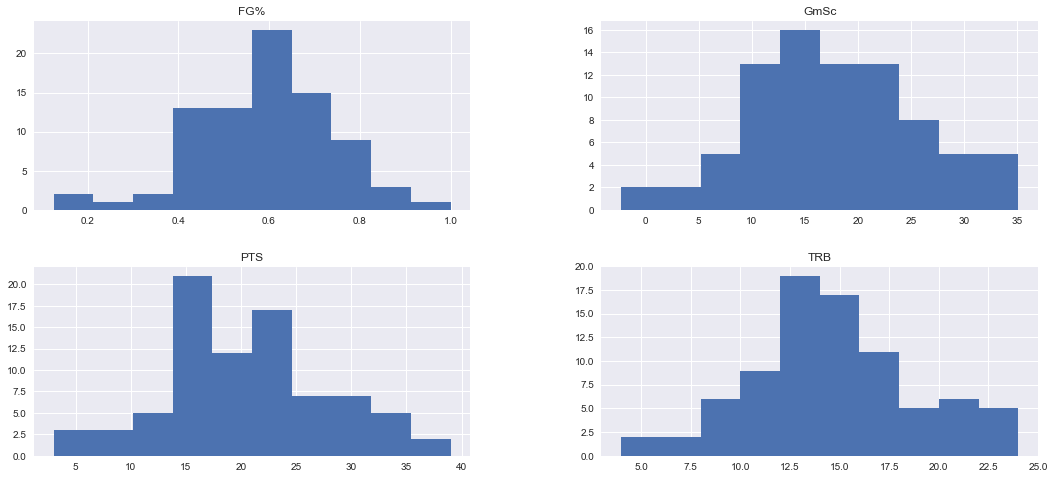

In [219]:
howard[['FG%', 'PTS', 'TRB', 'GmSc']].hist() # distribution of certain stats of interest
plt.show()

## Month Before Birth

In [63]:
# descriptive stats of performance before birth
final_howard[final_howard['time_since_birth'] > timedelta(days=0)].describe() 

,Rk,G,GS,FG,FGA,FG%,3P,3PA,3P%,FT,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,time_since_birth
count,10.00000,10.00000,10.0,10.000000,10.000000,10.000000,10.0,10.000000,1.0,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10
mean,5.50000,5.50000,1.0,7.500000,13.700000,0.540900,0.0,0.100000,0.0,6.800000,...,15.000000,1.600000,0.300000,2.400000,3.100000,3.400000,21.800000,18.390000,9.800000,10 days 00:00:00
std,3.02765,3.02765,0.0,2.953341,4.620005,0.106408,0.0,0.316228,NaN,3.457681,...,3.496029,0.843274,0.483046,2.065591,1.286684,1.349897,7.671013,8.246541,14.156271,5 days 08:59:46.046301
min,1.00000,1.00000,1.0,3.000000,8.000000,0.375000,0.0,0.000000,0.0,3.000000,...,9.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,8.400000,-13.000000,2 days 00:00:00
25%,3.25000,3.25000,1.0,6.250000,11.250000,0.458000,0.0,0.000000,0.0,4.250000,...,12.250000,1.000000,0.000000,1.000000,3.000000,2.000000,16.250000,11.875000,1.250000,5 days 18:00:00
50%,5.50000,5.50000,1.0,7.500000,12.500000,0.562500,0.0,0.000000,0.0,6.500000,...,15.500000,2.000000,0.000000,2.000000,3.500000,3.500000,19.000000,16.300000,14.500000,10 days 00:00:00
75%,7.75000,7.75000,1.0,8.000000,15.750000,0.630750,0.0,0.000000,0.0,7.750000,...,17.500000,2.000000,0.750000,3.000000,4.000000,4.750000,26.500000,22.900000,18.750000,14 days 06:00:00
max,10.00000,10.00000,1.0,13.000000,24.000000,0.667000,0.0,1.000000,0.0,13.000000,...,20.000000,3.000000,1.000000,7.000000,4.000000,5.000000,35.000000,33.500000,28.000000,18 days 00:00:00


## Month After Birth

In [64]:
# descriptive stats of performance after birth
final_howard[final_howard['time_since_birth'] < timedelta(days=0)].describe() 

,Rk,G,GS,FG,FGA,FG%,3P,3PA,3P%,FT,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,time_since_birth
count,15.000000,15.000000,15.0,15.000000,15.000000,15.000000,15.0,15.000000,1.0,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15
mean,19.000000,19.000000,1.0,8.666667,13.133333,0.654267,0.0,0.066667,0.0,7.466667,...,16.133333,1.533333,1.066667,2.800000,4.066667,3.400000,24.800000,21.866667,3.40000,-15 days +06:24:00
std,4.472136,4.472136,0.0,3.287784,3.833437,0.144543,0.0,0.258199,NaN,3.943651,...,3.961722,1.407463,1.279881,1.934647,2.433888,1.549193,8.849536,9.268893,10.32196,9 days 07:12:24.331428
min,12.000000,12.000000,1.0,4.000000,7.000000,0.400000,0.0,0.000000,0.0,1.000000,...,8.000000,0.000000,0.000000,0.000000,1.000000,1.000000,9.000000,5.300000,-13.00000,-29 days +00:00:00
25%,15.500000,15.500000,1.0,6.000000,10.500000,0.554000,0.0,0.000000,0.0,4.500000,...,13.500000,0.500000,0.000000,1.000000,2.000000,2.000000,17.500000,15.050000,-5.50000,-23 days +00:00:00
50%,19.000000,19.000000,1.0,9.000000,13.000000,0.688000,0.0,0.000000,0.0,6.000000,...,16.000000,1.000000,1.000000,3.000000,4.000000,4.000000,24.000000,20.900000,4.00000,-14 days +00:00:00
75%,22.500000,22.500000,1.0,11.000000,16.000000,0.725500,0.0,0.000000,0.0,11.000000,...,18.000000,2.000000,2.000000,4.000000,5.500000,4.500000,32.000000,28.900000,10.50000,-7 days +00:00:00
max,26.000000,26.000000,1.0,14.000000,19.000000,0.909000,0.0,1.000000,0.0,15.000000,...,23.000000,5.000000,4.000000,7.000000,9.000000,5.000000,39.000000,35.100000,18.00000,-1 days +00:00:00


## Before and After Birth Comparison

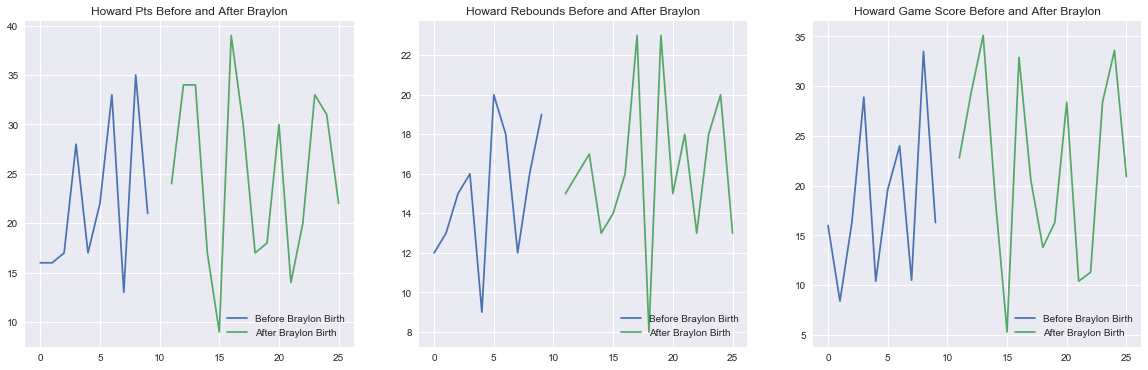

In [148]:
player_plots(final_howard, player_name='Howard', child_name='Braylon', position='F')

## Two Sample T-Test

For the sake of simplicity and due to lack of time I used a simple two-sample T-test that compares the means of each stat of interest before and after the date of birth.

Here are the details of the test:
- null hypothesis: there is no difference between the means of the stat before and after birth
- alternative hypothesis: there is a difference between the means of the state before and after birth
- p-value: the probability that we receive a result at least as extreme as the one observed, assuming truth of null hypothesis
- I used a confidence interval of 95% meaning that obtaining a p-value > 0.05 means that we cannot reject the null hypothesis and obtaining a p-value < 0.05 we do reject the null hypothesis

I evaluated a total of 10 athletes and 3 statistics per athlete so 30 different statistics. The only athlete-statistic combination that showed a significant difference in means before and after the player's birth of their child was Al Horford's rebounding - yet his game score still did not show a significant difference in means.

In [270]:
from scipy.stats import ttest_ind

ttest_ind(final_howard[final_howard['time_since_birth'] > timedelta(days=0)]['PTS'],
          final_howard[final_howard['time_since_birth'] < timedelta(days=0)]['PTS'])

Ttest_indResult(statistic=-0.87397805371552872, pvalue=0.39116472154136606)

In [238]:
ttest_ind(final_howard[final_howard['time_since_birth'] > timedelta(days=0)]['TRB'],
          final_howard[final_howard['time_since_birth'] < timedelta(days=0)]['TRB'])

Ttest_indResult(statistic=-0.73318872718037253, pvalue=0.47085085347680022)

In [239]:
ttest_ind(final_howard[final_howard['time_since_birth'] > timedelta(days=0)]['GmSc'],
          final_howard[final_howard['time_since_birth'] < timedelta(days=0)]['GmSc'])

Ttest_indResult(statistic=-0.95870620746249358, pvalue=0.34767706586674796)

# Shaq 

## Season Averages

In [197]:
shaq.describe()

,Rk,G,GS,FG,FGA,FG%,3P,3PA,3P%,FT,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,time_since_birth
count,79.000000,79.000000,79.0,79.000000,79.000000,79.000000,79.0,79.000000,1.0,79.000000,...,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79
mean,40.000000,40.000000,1.0,12.101266,21.075949,0.577582,0.0,0.012658,0.0,5.468354,...,9.392405,13.645570,3.784810,0.455696,3.025316,2.822785,3.227848,29.670886,24.677215,-13 days +10:37:58.481012
std,22.949219,22.949219,0.0,3.528619,5.384622,0.105985,0.0,0.112509,NaN,3.399983,...,3.763583,4.665855,2.373307,0.694252,1.901246,1.781382,1.386282,8.557081,7.932648,49 days 20:31:43.702266
min,1.000000,1.000000,1.0,3.000000,6.000000,0.267000,0.0,0.000000,0.0,0.000000,...,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,-0.500000,-99 days +00:00:00
25%,20.500000,20.500000,1.0,10.000000,17.000000,0.516500,0.0,0.000000,0.0,3.000000,...,6.000000,10.000000,2.000000,0.000000,2.000000,2.000000,2.000000,23.500000,19.800000,-55 days +12:00:00
50%,40.000000,40.000000,1.0,12.000000,21.000000,0.581000,0.0,0.000000,0.0,5.000000,...,9.000000,13.000000,3.000000,0.000000,3.000000,3.000000,3.000000,29.000000,24.300000,-11 days +00:00:00
75%,59.500000,59.500000,1.0,14.000000,25.000000,0.645000,0.0,0.000000,0.0,7.000000,...,12.000000,16.500000,5.500000,1.000000,4.000000,4.000000,4.000000,35.000000,29.450000,30 days 12:00:00
max,79.000000,79.000000,1.0,24.000000,35.000000,0.846000,0.0,1.000000,0.0,19.000000,...,17.000000,24.000000,9.000000,3.000000,8.000000,8.000000,6.000000,61.000000,49.500000,70 days 00:00:00


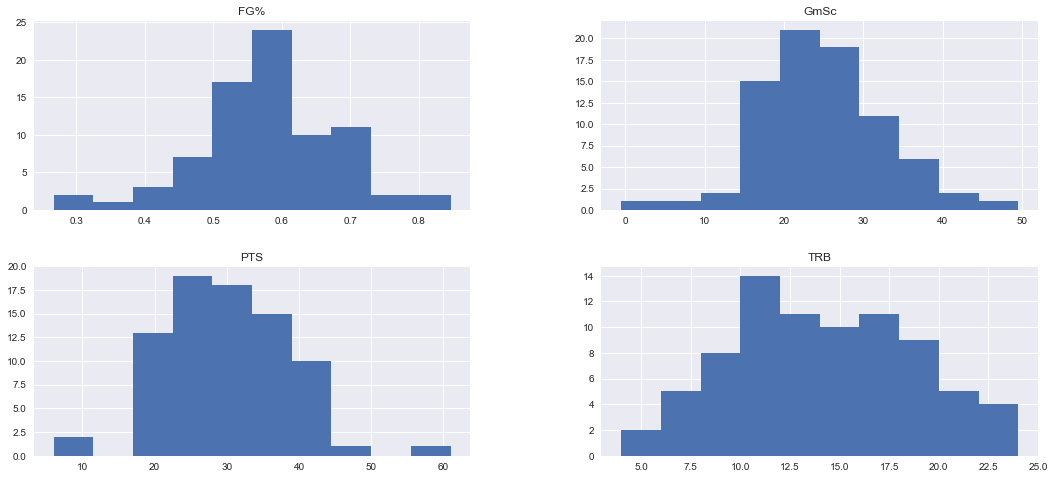

In [217]:
shaq[['FG%', 'PTS', 'TRB', 'GmSc']].hist()
plt.show()

## Before Birth

In [150]:
final_shaq[final_shaq['time_since_birth'] > timedelta(days=0)].describe()

,Rk,G,GS,FG,FGA,FG%,3P,3PA,3P%,FT,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,time_since_birth
count,14.0000,14.0000,14.0,14.000000,14.00000,14.000000,14.0,14.000000,1.0,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14
mean,27.5000,27.5000,1.0,11.357143,20.50000,0.544714,0.0,0.071429,0.0,4.642857,...,11.500000,16.142857,3.714286,0.357143,3.214286,3.714286,3.571429,27.357143,22.457143,15 days 17:08:34.285714
std,4.1833,4.1833,0.0,3.564939,3.71587,0.109127,0.0,0.267261,NaN,2.097880,...,3.436232,4.054573,2.584825,0.633324,1.476929,2.554892,1.452546,8.214501,8.815957,10 days 03:11:46.674276
min,21.0000,21.0000,1.0,4.000000,15.00000,0.267000,0.0,0.000000,0.0,1.000000,...,6.000000,9.000000,1.000000,0.000000,1.000000,0.000000,1.000000,9.000000,-0.500000,1 days 00:00:00
25%,24.2500,24.2500,1.0,9.250000,18.00000,0.500000,0.0,0.000000,0.0,3.000000,...,8.250000,13.250000,2.000000,0.000000,2.000000,2.000000,3.000000,23.000000,19.350000,6 days 06:00:00
50%,27.5000,27.5000,1.0,10.500000,20.00000,0.547000,0.0,0.000000,0.0,4.500000,...,12.000000,15.500000,3.000000,0.000000,3.000000,3.000000,3.500000,25.500000,22.750000,16 days 00:00:00
75%,30.7500,30.7500,1.0,13.750000,23.75000,0.616500,0.0,0.000000,0.0,6.000000,...,13.000000,19.000000,5.500000,0.750000,4.750000,6.000000,4.750000,33.500000,24.450000,24 days 12:00:00
max,34.0000,34.0000,1.0,17.000000,26.00000,0.708000,0.0,1.000000,0.0,8.000000,...,17.000000,24.000000,9.000000,2.000000,5.000000,8.000000,6.000000,40.000000,35.200000,30 days 00:00:00


## After Birth

In [151]:
final_shaq[final_shaq['time_since_birth'] < timedelta(days=0)].describe()

,Rk,G,GS,FG,FGA,FG%,3P,3PA,3P%,FT,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,time_since_birth
count,13.00000,13.00000,13.0,13.000000,13.000000,13.000000,13.0,13.0,0.0,13.000000,...,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13
mean,41.00000,41.00000,1.0,11.538462,20.384615,0.583846,0.0,0.0,NaN,5.384615,...,8.769231,13.076923,3.846154,0.538462,3.923077,3.000000,3.230769,28.461538,24.353846,-15 days +22:09:13.846153
std,3.89444,3.89444,0.0,2.295481,5.188745,0.116907,0.0,0.0,NaN,3.594868,...,4.003204,5.283016,2.478109,0.776250,1.934836,1.414214,1.235168,5.636420,5.349706,9 days 11:21:33.926484
min,35.00000,35.00000,1.0,8.000000,11.000000,0.400000,0.0,0.0,NaN,1.000000,...,3.000000,6.000000,0.000000,0.000000,0.000000,1.000000,1.000000,17.000000,14.400000,-29 days +00:00:00
25%,38.00000,38.00000,1.0,10.000000,17.000000,0.500000,0.0,0.0,NaN,4.000000,...,6.000000,9.000000,2.000000,0.000000,3.000000,2.000000,2.000000,26.000000,21.200000,-21 days +00:00:00
50%,41.00000,41.00000,1.0,11.000000,20.000000,0.579000,0.0,0.0,NaN,4.000000,...,8.000000,13.000000,3.000000,0.000000,4.000000,3.000000,3.000000,27.000000,24.300000,-13 days +00:00:00
75%,44.00000,44.00000,1.0,13.000000,23.000000,0.688000,0.0,0.0,NaN,7.000000,...,12.000000,16.000000,6.000000,1.000000,5.000000,4.000000,4.000000,31.000000,27.900000,-6 days +00:00:00
max,47.00000,47.00000,1.0,16.000000,31.000000,0.765000,0.0,0.0,NaN,15.000000,...,17.000000,23.000000,8.000000,2.000000,6.000000,5.000000,5.000000,37.000000,35.700000,-1 days +00:00:00


## Before and After Birth Comparison

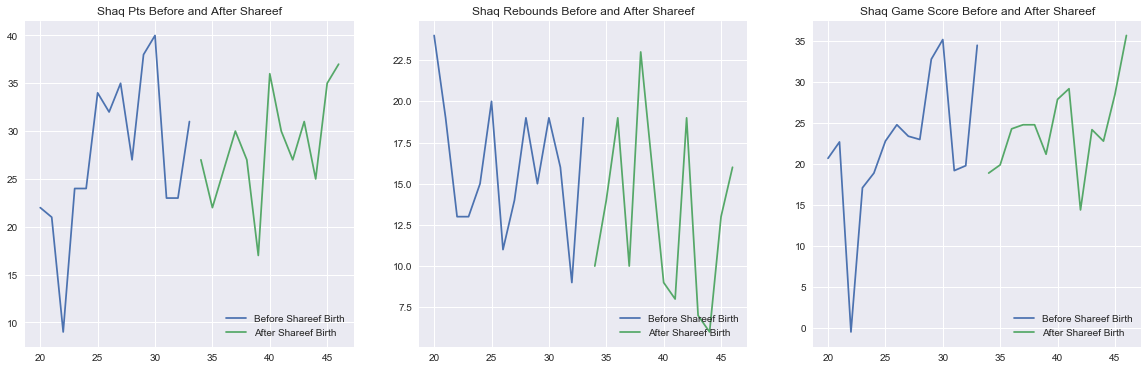

In [152]:
player_plots(final_shaq, player_name='Shaq', child_name='Shareef', position='F')

In [240]:
ttest_ind(final_shaq[final_shaq['time_since_birth'] > timedelta(days=0)]['PTS'],
          final_shaq[final_shaq['time_since_birth'] < timedelta(days=0)]['PTS'])

Ttest_indResult(statistic=-0.4041395526653952, pvalue=0.68954665618348998)

In [241]:
ttest_ind(final_shaq[final_shaq['time_since_birth'] > timedelta(days=0)]['TRB'],
          final_shaq[final_shaq['time_since_birth'] < timedelta(days=0)]['TRB'])

Ttest_indResult(statistic=1.6991978002231345, pvalue=0.10169411936342904)

In [242]:
ttest_ind(final_shaq[final_shaq['time_since_birth'] > timedelta(days=0)]['GmSc'],
          final_shaq[final_shaq['time_since_birth'] < timedelta(days=0)]['GmSc'])

Ttest_indResult(statistic=-0.66918300507408268, pvalue=0.50951193730433086)

# Melo

## Season Averages

In [198]:
melo.describe()

,Rk,G,GS,FG,FGA,FG%,3P,3PA,3P%,FT,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,time_since_birth
count,65.00000,65.00000,65.0,65.000000,65.000000,65.000000,65.000000,65.000000,54.000000,65.000000,...,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65
mean,33.00000,33.00000,1.0,10.630769,22.353846,0.475046,0.615385,2.292308,0.264389,7.061538,...,6.015385,3.830769,1.184615,0.353846,3.600000,3.123077,28.938462,18.821538,1.338462,35 days 00:22:09.230769
std,18.90767,18.90767,0.0,2.764559,4.044405,0.094946,0.842101,1.774147,0.310302,3.626624,...,2.154155,2.027693,1.184434,0.597672,1.869158,1.494863,6.449023,8.003427,12.283471,53 days 06:39:54.956281
min,1.00000,1.00000,1.0,3.000000,13.000000,0.200000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,-0.100000,-31.000000,-40 days +00:00:00
25%,17.00000,17.00000,1.0,9.000000,19.000000,0.423000,0.000000,1.000000,0.000000,4.000000,...,5.000000,2.000000,0.000000,0.000000,3.000000,2.000000,26.000000,15.000000,-8.000000,-13 days +00:00:00
50%,33.00000,33.00000,1.0,11.000000,22.000000,0.464000,0.000000,2.000000,0.208500,7.000000,...,6.000000,4.000000,1.000000,0.000000,4.000000,4.000000,30.000000,19.600000,3.000000,26 days 00:00:00
75%,49.00000,49.00000,1.0,12.000000,26.000000,0.545000,1.000000,3.000000,0.500000,9.000000,...,8.000000,5.000000,2.000000,1.000000,5.000000,4.000000,33.000000,24.600000,9.000000,89 days 00:00:00
max,65.00000,65.00000,1.0,17.000000,30.000000,0.667000,4.000000,9.000000,1.000000,16.000000,...,10.000000,10.000000,4.000000,2.000000,10.000000,6.000000,42.000000,33.800000,28.000000,125 days 00:00:00


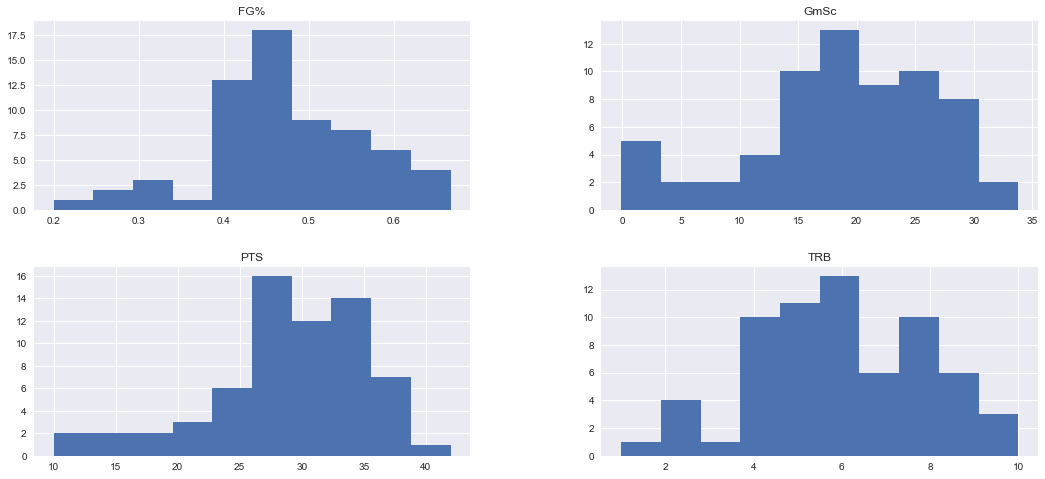

In [221]:
melo[['FG%', 'PTS', 'TRB', 'GmSc']].hist()
plt.show()

## Before Birth

In [154]:
final_melo[final_melo['time_since_birth'] > timedelta(days=0)].describe()

,Rk,G,GS,FG,FGA,FG%,3P,3PA,3P%,FT,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,time_since_birth
count,13.00000,13.00000,13.0,13.000000,13.000000,13.000000,13.000000,13.000000,11.000000,13.000000,...,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13
mean,37.00000,37.00000,1.0,10.692308,22.615385,0.474385,0.384615,2.000000,0.265182,6.615385,...,6.923077,4.769231,0.923077,0.538462,4.153846,3.307692,28.384615,18.284615,-0.230769,16 days 09:13:50.769230
std,3.89444,3.89444,0.0,2.358835,4.154084,0.082421,0.506370,1.581139,0.395835,2.959123,...,1.656379,3.031882,1.115164,0.776250,1.908147,1.182132,5.895457,5.492244,10.449512,9 days 14:56:11.597005
min,31.00000,31.00000,1.0,6.000000,15.000000,0.391000,0.000000,0.000000,0.000000,2.000000,...,4.000000,0.000000,0.000000,0.000000,1.000000,1.000000,15.000000,6.000000,-19.000000,1 days 00:00:00
25%,34.00000,34.00000,1.0,9.000000,19.000000,0.421000,0.000000,1.000000,0.000000,4.000000,...,6.000000,3.000000,0.000000,0.000000,3.000000,2.000000,27.000000,14.900000,-8.000000,9 days 00:00:00
50%,37.00000,37.00000,1.0,11.000000,23.000000,0.458000,0.000000,2.000000,0.000000,7.000000,...,7.000000,5.000000,1.000000,0.000000,4.000000,4.000000,29.000000,20.000000,-1.000000,15 days 00:00:00
75%,40.00000,40.00000,1.0,12.000000,25.000000,0.480000,1.000000,2.000000,0.375000,8.000000,...,8.000000,6.000000,1.000000,1.000000,5.000000,4.000000,33.000000,21.500000,8.000000,25 days 00:00:00
max,43.00000,43.00000,1.0,14.000000,28.000000,0.667000,1.000000,6.000000,1.000000,12.000000,...,10.000000,10.000000,3.000000,2.000000,7.000000,5.000000,36.000000,25.900000,16.000000,30 days 00:00:00


## After Birth

In [155]:
final_melo[final_melo['time_since_birth'] < timedelta(days=0)].describe()

,Rk,G,GS,FG,FGA,FG%,3P,3PA,3P%,FT,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,time_since_birth
count,16.000000,16.000000,16.0,16.000000,16.000000,16.000000,16.00000,16.000000,11.000000,16.000000,...,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16
mean,51.500000,51.500000,1.0,9.500000,20.250000,0.464812,0.31250,1.437500,0.181818,6.625000,...,6.187500,2.875000,1.187500,0.125000,3.125000,3.500000,25.937500,16.406250,2.250000,-17 days +10:30:00
std,4.760952,4.760952,0.0,2.804758,2.206052,0.124243,0.60208,1.152895,0.263086,3.575379,...,2.737852,1.258306,1.046821,0.341565,1.668333,1.316561,6.777106,8.738609,15.110703,8 days 20:19:07.062531
min,44.000000,44.000000,1.0,3.000000,15.000000,0.200000,0.00000,0.000000,0.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,10.000000,-0.100000,-31.000000,-30 days +00:00:00
25%,47.750000,47.750000,1.0,7.750000,19.000000,0.416250,0.00000,0.000000,0.000000,3.750000,...,4.750000,2.000000,0.000000,0.000000,1.750000,3.000000,25.250000,14.750000,-3.750000,-24 days +12:00:00
50%,51.500000,51.500000,1.0,10.000000,20.000000,0.500000,0.00000,2.000000,0.000000,6.500000,...,6.500000,3.000000,1.000000,0.000000,3.000000,4.000000,28.500000,18.250000,3.500000,-17 days +00:00:00
75%,55.250000,55.250000,1.0,11.250000,21.250000,0.542750,0.25000,2.000000,0.416500,9.000000,...,8.000000,3.250000,2.000000,0.000000,4.000000,4.250000,30.250000,22.050000,7.250000,-10 days +12:00:00
max,59.000000,59.000000,1.0,13.000000,24.000000,0.650000,2.00000,3.000000,0.667000,15.000000,...,10.000000,5.000000,3.000000,1.000000,7.000000,5.000000,32.000000,28.100000,28.000000,-2 days +00:00:00


## Before and After Comparison

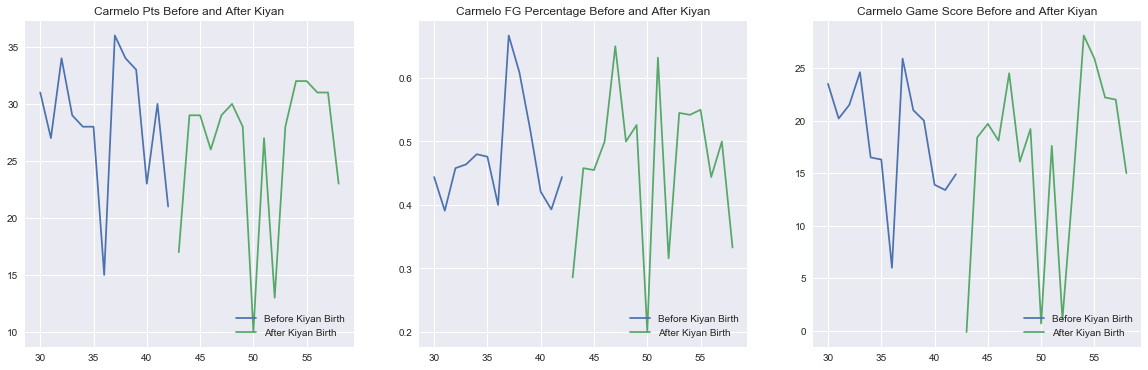

In [158]:
player_plots(final_melo, 'Carmelo', 'Kiyan', 'G')

In [243]:
ttest_ind(final_melo[final_melo['time_since_birth'] > timedelta(days=0)]['PTS'],
          final_melo[final_melo['time_since_birth'] < timedelta(days=0)]['PTS'])

Ttest_indResult(statistic=1.0239732296255759, pvalue=0.31493526443000086)

In [245]:
ttest_ind(final_melo[final_melo['time_since_birth'] > timedelta(days=0)]['FG%'],
          final_melo[final_melo['time_since_birth'] < timedelta(days=0)]['FG%'])

Ttest_indResult(statistic=0.23807086370100375, pvalue=0.81362362812389111)

In [246]:
ttest_ind(final_melo[final_melo['time_since_birth'] > timedelta(days=0)]['GmSc'],
          final_melo[final_melo['time_since_birth'] < timedelta(days=0)]['GmSc'])

Ttest_indResult(statistic=0.67325034260954897, pvalue=0.50651044698862058)

# Allen

## Season Averages

In [199]:
allen.describe()

,Rk,G,GS,FG,FGA,FG%,3P,3PA,3P%,FT,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,time_since_birth
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,...,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.00000,46.000000,46.000000,46
mean,23.500000,23.500000,0.913043,4.913043,10.717391,0.441043,2.304348,5.086957,0.436043,2.108696,...,3.086957,2.369565,1.065217,0.173913,1.478261,1.804348,14.23913,10.317391,2.130435,-21 days +16:10:26.086956
std,13.422618,13.422618,0.284885,2.355382,3.455514,0.141856,1.518326,2.355382,0.212676,1.864621,...,1.811397,1.768348,1.103573,0.437384,1.277830,1.326978,6.41590,5.547304,12.157501,31 days 11:52:18.511598
min,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000,1.100000,-25.000000,-76 days +00:00:00
25%,12.250000,12.250000,1.000000,3.000000,8.250000,0.343500,1.000000,3.000000,0.333000,1.000000,...,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,9.25000,6.050000,-6.500000,-46 days +12:00:00
50%,23.500000,23.500000,1.000000,5.000000,10.000000,0.452500,2.000000,5.000000,0.427500,2.000000,...,3.000000,2.000000,1.000000,0.000000,1.000000,2.000000,14.00000,9.850000,3.000000,-20 days +12:00:00
75%,34.750000,34.750000,1.000000,7.000000,13.000000,0.556000,3.000000,6.000000,0.592750,3.000000,...,4.000000,3.000000,1.750000,0.000000,2.000000,3.000000,19.00000,13.775000,8.750000,6 days 12:00:00
max,46.000000,46.000000,1.000000,9.000000,20.000000,0.667000,6.000000,11.000000,0.857000,8.000000,...,7.000000,8.000000,4.000000,2.000000,5.000000,5.000000,28.00000,24.700000,24.000000,31 days 00:00:00


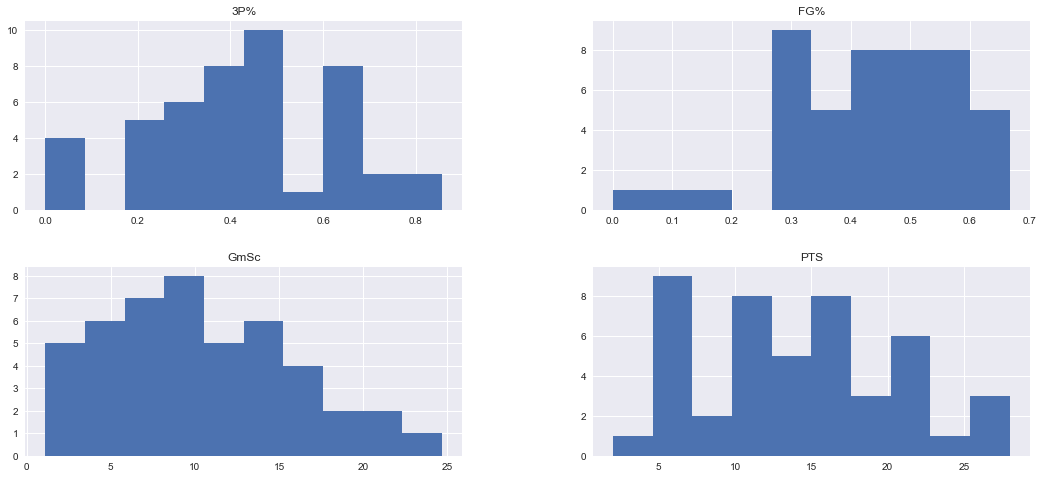

In [223]:
allen[['FG%', 'PTS', '3P%', 'GmSc']].hist()
plt.show()

## Before Birth

In [159]:
final_allen[final_allen['time_since_birth'] > timedelta(days=0)].describe()

,Rk,G,GS,FG,FGA,FG%,3P,3PA,3P%,FT,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,time_since_birth
count,13.00000,13.00000,13.0,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,...,13.000000,13.000000,13.000000,13.0,13.000000,13.000000,13.000000,13.000000,13.000000,13
mean,8.00000,8.00000,1.0,4.769231,9.615385,0.481846,2.615385,4.692308,0.533846,2.307692,...,3.000000,2.307692,0.846154,0.0,1.846154,1.461538,14.461538,10.630769,2.384615,16 days 03:41:32.307692
std,3.89444,3.89444,0.0,2.241794,2.902254,0.127722,1.804553,2.175033,0.177652,2.097006,...,1.581139,1.436698,0.688737,0.0,1.463224,1.050031,7.687819,7.017999,13.543378,9 days 03:03:19.131859
min,2.00000,2.00000,1.0,2.000000,5.000000,0.286000,1.000000,2.000000,0.333000,0.000000,...,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,6.000000,1.900000,-19.000000,3 days 00:00:00
25%,5.00000,5.00000,1.0,3.000000,8.000000,0.375000,1.000000,3.000000,0.400000,1.000000,...,2.000000,1.000000,0.000000,0.0,1.000000,1.000000,7.000000,5.400000,-7.000000,9 days 00:00:00
50%,8.00000,8.00000,1.0,5.000000,9.000000,0.500000,2.000000,5.000000,0.500000,2.000000,...,3.000000,2.000000,1.000000,0.0,2.000000,2.000000,14.000000,9.500000,1.000000,14 days 00:00:00
75%,11.00000,11.00000,1.0,6.000000,11.000000,0.563000,4.000000,6.000000,0.667000,4.000000,...,3.000000,3.000000,1.000000,0.0,3.000000,2.000000,17.000000,15.200000,13.000000,24 days 00:00:00
max,14.00000,14.00000,1.0,9.000000,16.000000,0.667000,6.000000,8.000000,0.857000,6.000000,...,6.000000,5.000000,2.000000,0.0,5.000000,3.000000,28.000000,24.700000,24.000000,29 days 00:00:00


## After Birth

In [160]:
final_allen[final_allen['time_since_birth'] < timedelta(days=0)].describe()

,Rk,G,GS,FG,FGA,FG%,3P,3PA,3P%,FT,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,time_since_birth
count,14.0000,14.0000,14.0,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14
mean,21.5000,21.5000,1.0,5.214286,11.857143,0.426929,2.000000,4.857143,0.380357,1.785714,...,3.214286,3.214286,0.785714,0.285714,1.928571,2.428571,14.214286,9.357143,-1.785714,-16 days +05:08:34.285714
std,4.1833,4.1833,0.0,2.359223,3.738719,0.122340,1.240347,2.213843,0.246402,2.259291,...,2.154729,2.190138,0.699293,0.611250,1.206666,1.283881,4.742258,4.590913,12.843308,7 days 20:04:41.073269
min,15.0000,15.0000,1.0,1.000000,5.000000,0.200000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,1.100000,-25.000000,-28 days +00:00:00
25%,18.2500,18.2500,1.0,4.000000,9.250000,0.343500,1.000000,4.250000,0.200000,0.000000,...,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,12.000000,7.100000,-11.500000,-22 days +06:00:00
50%,21.5000,21.5000,1.0,5.000000,12.000000,0.425000,2.000000,5.000000,0.354000,1.000000,...,3.000000,3.000000,1.000000,0.000000,2.000000,2.500000,12.500000,9.250000,1.500000,-16 days +12:00:00
75%,24.7500,24.7500,1.0,6.750000,14.000000,0.500000,3.000000,5.750000,0.600000,2.000000,...,5.000000,3.750000,1.000000,0.000000,2.750000,3.750000,16.500000,10.625000,3.750000,-10 days +12:00:00
max,28.0000,28.0000,1.0,9.000000,20.000000,0.643000,4.000000,9.000000,0.750000,8.000000,...,6.000000,8.000000,2.000000,2.000000,4.000000,4.000000,22.000000,18.400000,23.000000,-4 days +00:00:00


## Before and After Comparison

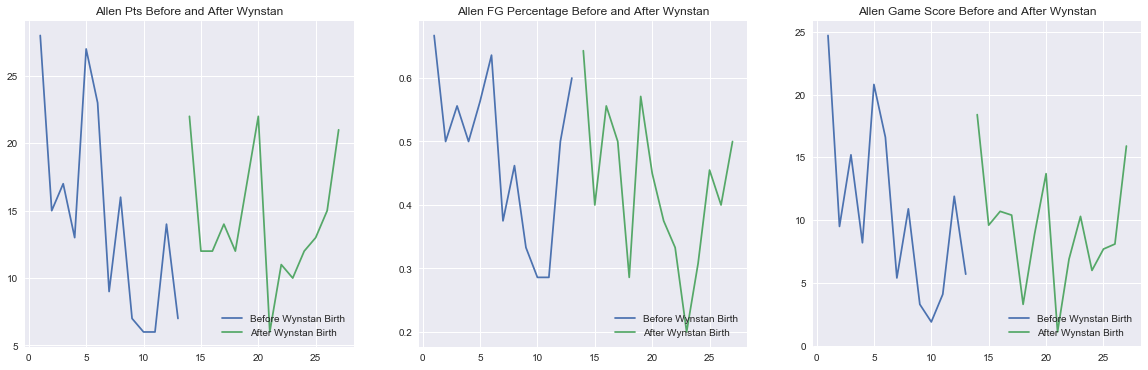

In [161]:
player_plots(final_allen, 'Allen', 'Wynstan', 'G')

In [247]:
ttest_ind(final_allen[final_allen['time_since_birth'] > timedelta(days=0)]['PTS'],
          final_allen[final_allen['time_since_birth'] < timedelta(days=0)]['PTS'])

Ttest_indResult(statistic=0.10141925237952411, pvalue=0.92002669790835201)

In [248]:
ttest_ind(final_allen[final_allen['time_since_birth'] > timedelta(days=0)]['FG%'],
          final_allen[final_allen['time_since_birth'] < timedelta(days=0)]['FG%'])

Ttest_indResult(statistic=1.1410903382316269, pvalue=0.26464554758934461)

In [249]:
ttest_ind(final_allen[final_allen['time_since_birth'] > timedelta(days=0)]['GmSc'],
          final_allen[final_allen['time_since_birth'] < timedelta(days=0)]['GmSc'])

Ttest_indResult(statistic=0.56215009569033969, pvalue=0.57901973063215095)

# Kobe

## Season Averages

In [200]:
kobe.describe()

,Rk,G,GS,FG,FGA,FG%,3P,3PA,3P%,FT,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,time_since_birth
count,82.000000,82.000000,82.0,82.000000,82.000000,82.000000,82.000000,82.000000,78.000000,82.000000,...,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82
mean,41.500000,41.500000,1.0,10.585366,23.463415,0.452976,1.512195,3.951220,0.348103,7.329268,...,6.878049,5.865854,2.207317,0.817073,3.512195,2.658537,30.012195,22.165854,3.231707,-4 days +14:02:55.609756
std,23.815261,23.815261,0.0,3.921927,7.715937,0.094294,1.887214,2.972726,0.277920,3.861986,...,3.088770,3.029738,1.411923,0.818430,1.793293,1.326087,10.499258,8.230795,12.928387,51 days 15:03:42.231122
min,1.000000,1.000000,1.0,4.000000,11.000000,0.238000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,4.500000,-22.000000,-87 days +00:00:00
25%,21.250000,21.250000,1.0,8.000000,16.250000,0.385000,0.000000,2.000000,0.000000,4.000000,...,5.000000,4.000000,1.000000,0.000000,2.000000,2.000000,21.000000,15.825000,-7.000000,-51 days +12:00:00
50%,41.500000,41.500000,1.0,10.000000,23.000000,0.455000,1.000000,3.000000,0.333000,7.000000,...,6.000000,5.000000,2.000000,1.000000,3.500000,3.000000,30.000000,21.900000,5.000000,-4 days +00:00:00
75%,61.750000,61.750000,1.0,13.000000,29.000000,0.510500,2.000000,5.000000,0.500000,9.750000,...,9.000000,7.000000,3.000000,1.000000,5.000000,4.000000,38.000000,28.050000,12.000000,43 days 12:00:00
max,82.000000,82.000000,1.0,19.000000,47.000000,0.688000,12.000000,18.000000,1.000000,18.000000,...,15.000000,14.000000,6.000000,3.000000,8.000000,5.000000,55.000000,41.500000,37.000000,82 days 00:00:00


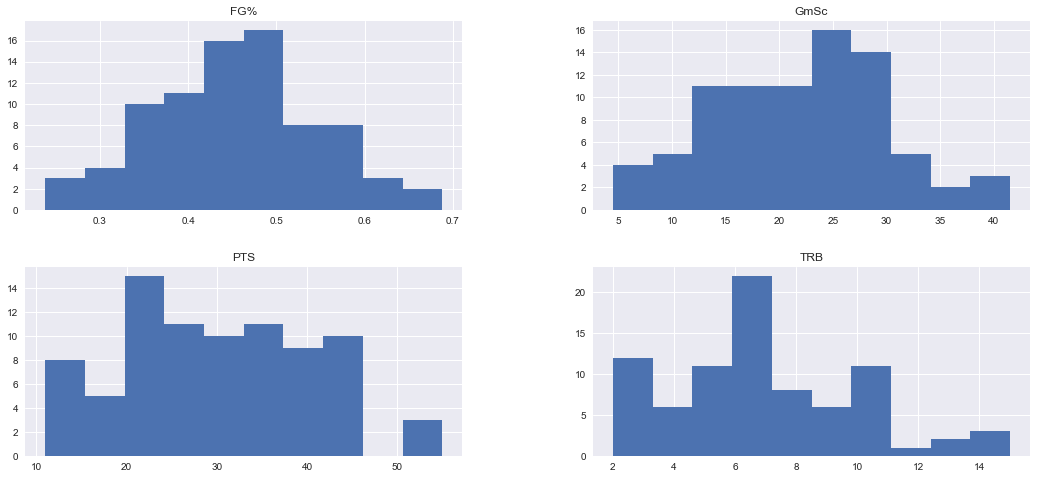

In [224]:
kobe[['FG%', 'PTS', 'TRB', 'GmSc']].hist()
plt.show()

## Before Birth

In [162]:
final_kobe[final_kobe['time_since_birth'] > timedelta(days=0)].describe()

,Rk,G,GS,FG,FGA,FG%,3P,3PA,3P%,FT,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,time_since_birth
count,12.000000,12.000000,12.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12
mean,33.500000,33.500000,1.0,11.250000,24.666667,0.454000,2.000000,5.083333,0.334750,7.333333,...,7.750000,7.000000,2.416667,1.000000,3.583333,2.583333,31.833333,24.858333,7.500000,15 days 18:00:00
std,3.605551,3.605551,0.0,4.180583,6.637816,0.116096,3.275252,4.501683,0.325922,3.576014,...,4.202272,2.923261,1.083625,0.738549,1.564279,1.240112,9.665622,6.494117,11.965861,9 days 09:38:01.151505
min,28.000000,28.000000,1.0,5.000000,12.000000,0.238000,0.000000,1.000000,0.000000,1.000000,...,2.000000,3.000000,1.000000,0.000000,1.000000,1.000000,13.000000,14.500000,-9.000000,2 days 00:00:00
25%,30.750000,30.750000,1.0,7.000000,21.000000,0.405000,0.000000,2.750000,0.000000,4.750000,...,3.750000,4.750000,2.000000,0.750000,2.000000,1.750000,25.750000,18.225000,-3.250000,8 days 12:00:00
50%,33.500000,33.500000,1.0,12.000000,25.500000,0.463000,1.500000,4.000000,0.291500,7.000000,...,8.000000,6.500000,2.000000,1.000000,4.000000,3.000000,33.500000,27.550000,6.500000,14 days 12:00:00
75%,36.250000,36.250000,1.0,15.000000,28.250000,0.571000,2.000000,5.250000,0.541750,10.000000,...,11.000000,9.250000,3.250000,1.250000,5.000000,3.000000,37.500000,29.450000,16.750000,22 days 18:00:00
max,39.000000,39.000000,1.0,16.000000,35.000000,0.583000,12.000000,18.000000,1.000000,12.000000,...,15.000000,12.000000,4.000000,2.000000,6.000000,5.000000,45.000000,33.700000,25.000000,30 days 00:00:00


## After Birth

In [163]:
final_kobe[final_kobe['time_since_birth'] < timedelta(days=0)].describe()

,Rk,G,GS,FG,FGA,FG%,3P,3PA,3P%,FT,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,time_since_birth
count,13.00000,13.00000,13.0,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,...,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13
mean,46.00000,46.00000,1.0,13.076923,26.769231,0.485154,2.076923,4.384615,0.469846,9.461538,...,5.153846,4.923077,2.153846,1.076923,3.769231,2.461538,37.692308,27.146154,8.153846,-17 days +22:09:13.846153
std,3.89444,3.89444,0.0,4.310095,7.959835,0.087808,1.187542,2.292686,0.250541,5.206012,...,2.034951,2.396579,1.143544,0.954074,2.278664,1.506397,11.585800,8.866004,14.718730,9 days 17:11:45.084971
min,40.00000,40.00000,1.0,4.000000,14.000000,0.286000,0.000000,1.000000,0.000000,2.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,11.000000,10.200000,-9.000000,-30 days +00:00:00
25%,43.00000,43.00000,1.0,12.000000,20.000000,0.452000,1.000000,3.000000,0.333000,7.000000,...,3.000000,4.000000,2.000000,0.000000,2.000000,1.000000,35.000000,24.800000,-2.000000,-24 days +00:00:00
50%,46.00000,46.00000,1.0,14.000000,28.000000,0.483000,2.000000,4.000000,0.500000,9.000000,...,5.000000,5.000000,2.000000,1.000000,4.000000,2.000000,40.000000,26.300000,5.000000,-16 days +00:00:00
75%,49.00000,49.00000,1.0,15.000000,31.000000,0.529000,3.000000,5.000000,0.600000,11.000000,...,7.000000,5.000000,3.000000,2.000000,5.000000,4.000000,44.000000,33.500000,12.000000,-10 days +00:00:00
max,52.00000,52.00000,1.0,19.000000,41.000000,0.630000,4.000000,9.000000,1.000000,18.000000,...,8.000000,11.000000,4.000000,3.000000,7.000000,5.000000,52.000000,40.500000,37.000000,-1 days +00:00:00


## Before and After Birth Comparison

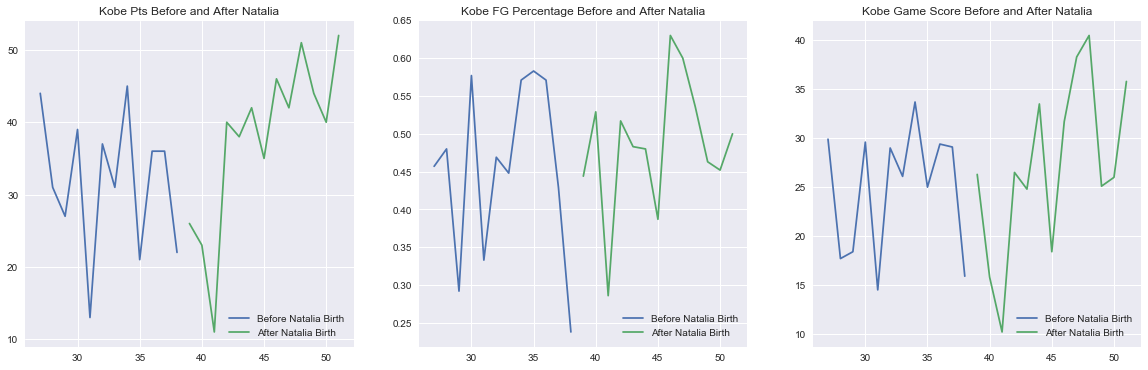

In [164]:
player_plots(final_kobe, 'Kobe', 'Natalia', 'G')

In [250]:
ttest_ind(final_kobe[final_kobe['time_since_birth'] > timedelta(days=0)]['PTS'],
          final_kobe[final_kobe['time_since_birth'] < timedelta(days=0)]['PTS'])

Ttest_indResult(statistic=-1.3664839549760515, pvalue=0.18499848154247275)

In [251]:
ttest_ind(final_kobe[final_kobe['time_since_birth'] > timedelta(days=0)]['FG%'],
          final_kobe[final_kobe['time_since_birth'] < timedelta(days=0)]['FG%'])

Ttest_indResult(statistic=-0.76059654590557557, pvalue=0.45462540843811705)

In [252]:
ttest_ind(final_kobe[final_kobe['time_since_birth'] > timedelta(days=0)]['GmSc'],
          final_kobe[final_kobe['time_since_birth'] < timedelta(days=0)]['GmSc'])

Ttest_indResult(statistic=-0.73063943359345451, pvalue=0.47237718807287798)

# TMac

## Season Averages

In [202]:
tmac.describe()

,Rk,G,GS,FG,FGA,FG%,3P,3PA,3P%,FT,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,time_since_birth
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,74.000000,75.000000,...,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75
mean,38.000000,38.000000,0.986667,11.053333,24.173333,0.457907,2.306667,5.973333,0.386932,7.680000,...,6.506667,5.480000,1.653333,0.786667,2.600000,2.080000,32.093333,23.998667,2.666667,1 days 21:07:12
std,21.794495,21.794495,0.115470,3.079546,5.529707,0.092367,1.576631,2.813929,0.217043,3.639721,...,2.979086,2.910187,1.179708,0.990404,1.619142,1.477397,8.226807,8.009918,13.195345,50 days 20:31:21.460719
min,1.000000,1.000000,0.000000,3.000000,12.000000,0.200000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,3.300000,-25.000000,-81 days +00:00:00
25%,19.500000,19.500000,1.000000,9.000000,19.500000,0.397000,1.000000,4.000000,0.250000,5.500000,...,4.000000,3.000000,1.000000,0.000000,1.000000,1.000000,27.000000,19.500000,-7.000000,-42 days +00:00:00
50%,38.000000,38.000000,1.000000,11.000000,25.000000,0.458000,2.000000,6.000000,0.375000,7.000000,...,6.000000,5.000000,2.000000,1.000000,2.000000,2.000000,33.000000,24.100000,1.000000,2 days 00:00:00
75%,56.500000,56.500000,1.000000,13.000000,28.000000,0.529500,3.000000,7.000000,0.500000,10.000000,...,8.500000,7.000000,2.000000,1.000000,4.000000,3.000000,37.000000,28.800000,11.500000,46 days 00:00:00
max,75.000000,75.000000,1.000000,17.000000,37.000000,0.632000,7.000000,16.000000,1.000000,18.000000,...,14.000000,13.000000,5.000000,4.000000,7.000000,5.000000,52.000000,42.200000,36.000000,86 days 00:00:00


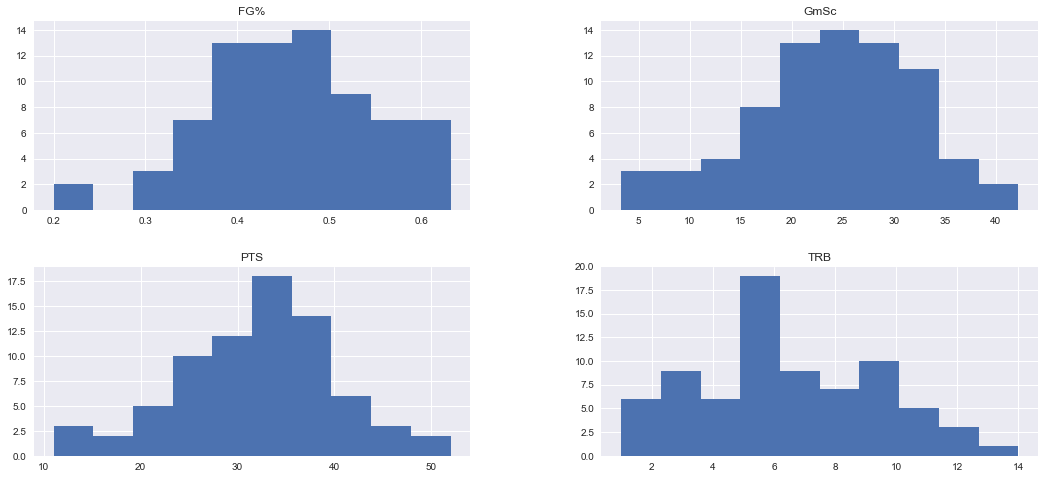

In [225]:
tmac[['FG%', 'PTS', 'TRB', 'GmSc']].hist()
plt.show()

## Before Birth

In [165]:
final_tmac[final_tmac['time_since_birth'] > timedelta(days=0)].describe()

,Rk,G,GS,FG,FGA,FG%,3P,3PA,3P%,FT,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,time_since_birth
count,15.000000,15.000000,15.0,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15
mean,32.000000,32.000000,1.0,10.666667,23.066667,0.463733,1.933333,5.066667,0.407200,8.200000,...,6.733333,5.733333,2.066667,0.466667,2.800000,2.066667,31.466667,24.040000,0.333333,15 days 00:00:00
std,4.472136,4.472136,0.0,2.468854,4.495500,0.073440,1.032796,1.791514,0.230157,3.820995,...,2.737743,2.520393,1.387015,0.743223,1.320173,1.279881,6.588590,6.536469,10.054613,9 days 04:31:26.584199
min,25.000000,25.000000,1.0,6.000000,16.000000,0.316000,0.000000,1.000000,0.000000,2.000000,...,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,20.000000,11.000000,-15.000000,1 days 00:00:00
25%,28.500000,28.500000,1.0,9.000000,19.000000,0.423500,1.000000,4.000000,0.268000,6.500000,...,5.000000,4.000000,1.000000,0.000000,2.000000,1.000000,27.500000,20.750000,-8.500000,8 days 12:00:00
50%,32.000000,32.000000,1.0,11.000000,23.000000,0.474000,2.000000,5.000000,0.400000,8.000000,...,6.000000,6.000000,2.000000,0.000000,3.000000,2.000000,31.000000,24.100000,0.000000,15 days 00:00:00
75%,35.500000,35.500000,1.0,12.500000,26.500000,0.491500,2.500000,6.500000,0.500000,9.000000,...,8.000000,7.500000,3.000000,1.000000,3.500000,2.500000,35.000000,28.100000,8.000000,22 days 00:00:00
max,39.000000,39.000000,1.0,14.000000,31.000000,0.611000,4.000000,8.000000,1.000000,18.000000,...,11.000000,10.000000,5.000000,2.000000,6.000000,5.000000,46.000000,36.300000,16.000000,29 days 00:00:00


## After Birth

In [166]:
final_tmac[final_tmac['time_since_birth'] < timedelta(days=0)].describe()

,Rk,G,GS,FG,FGA,FG%,3P,3PA,3P%,FT,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,time_since_birth
count,11.000000,11.000000,11.0,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11
mean,45.000000,45.000000,1.0,11.727273,27.727273,0.424636,2.454545,7.090909,0.356455,8.363636,...,8.090909,5.818182,1.727273,0.545455,1.909091,2.818182,34.272727,25.127273,1.818182,-17 days +19:38:10.909090
std,3.316625,3.316625,0.0,2.493628,5.728716,0.053228,1.752920,4.036200,0.178652,4.588523,...,2.625054,2.482667,0.904534,0.687552,1.578261,1.401298,7.537784,7.040752,9.421446,9 days 04:26:21.231449
min,40.000000,40.000000,1.0,7.000000,18.000000,0.346000,1.000000,3.000000,0.143000,2.000000,...,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,24.000000,14.600000,-11.000000,-29 days +00:00:00
25%,42.500000,42.500000,1.0,10.500000,24.500000,0.383500,1.000000,5.000000,0.225000,5.000000,...,6.000000,3.500000,1.000000,0.000000,1.000000,2.500000,31.500000,21.150000,-5.500000,-23 days +00:00:00
50%,45.000000,45.000000,1.0,12.000000,26.000000,0.419000,2.000000,6.000000,0.313000,8.000000,...,8.000000,6.000000,2.000000,0.000000,2.000000,3.000000,35.000000,24.900000,1.000000,-19 days +00:00:00
75%,47.500000,47.500000,1.0,13.500000,31.500000,0.463500,3.000000,7.500000,0.431000,11.500000,...,10.000000,7.000000,2.000000,1.000000,2.500000,3.500000,36.500000,28.400000,7.000000,-9 days +00:00:00
max,50.000000,50.000000,1.0,15.000000,37.000000,0.522000,6.000000,16.000000,0.667000,16.000000,...,12.000000,11.000000,3.000000,2.000000,5.000000,5.000000,52.000000,38.700000,20.000000,-1 days +00:00:00


## Before and After Birth Comparison

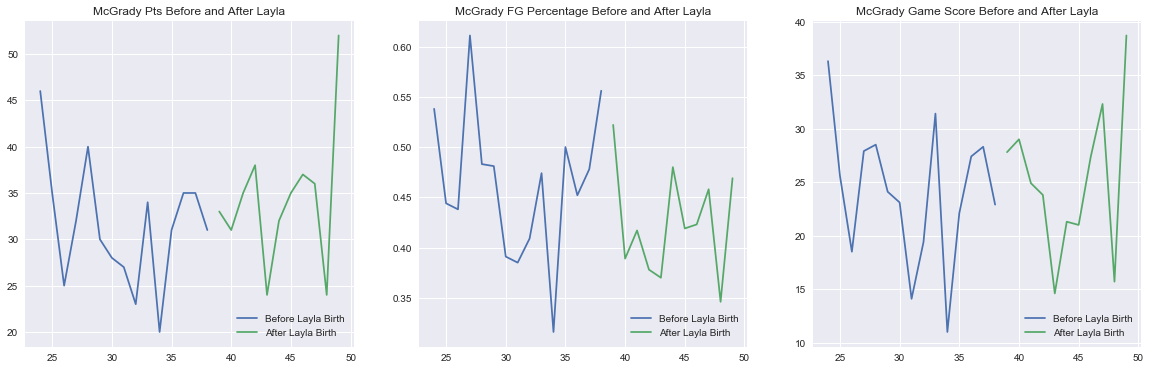

In [167]:
player_plots(final_tmac, 'McGrady', 'Layla', 'G')

In [253]:
ttest_ind(final_tmac[final_tmac['time_since_birth'] > timedelta(days=0)]['PTS'],
          final_tmac[final_tmac['time_since_birth'] < timedelta(days=0)]['PTS'])

Ttest_indResult(statistic=-1.0098804680735773, pvalue=0.32262635277687579)

In [254]:
ttest_ind(final_tmac[final_tmac['time_since_birth'] > timedelta(days=0)]['FG%'],
          final_tmac[final_tmac['time_since_birth'] < timedelta(days=0)]['FG%'])

Ttest_indResult(statistic=1.4973336494310556, pvalue=0.14734380044506712)

In [255]:
ttest_ind(final_tmac[final_tmac['time_since_birth'] > timedelta(days=0)]['GmSc'],
          final_tmac[final_tmac['time_since_birth'] < timedelta(days=0)]['GmSc'])

Ttest_indResult(statistic=-0.40570933973392326, pvalue=0.68855051844040593)

# Roy

## Season Averages

In [203]:
roy.describe()

,Rk,G,GS,FG,FGA,FG%,3P,3PA,3P%,FT,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,time_since_birth
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,53.000000,57.000000,...,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57
mean,29.000000,29.000000,0.964912,6.122807,13.421053,0.451158,0.964912,2.561404,0.377283,3.543860,...,4.385965,4.035088,1.175439,0.175439,2.035088,2.438596,16.754386,12.370175,-3.368421,51 days 05:03:09.473684
std,16.598193,16.598193,0.185637,2.383501,4.101164,0.138661,0.905635,1.476211,0.331611,2.860258,...,2.498245,2.427263,1.241008,0.383723,1.308829,1.451816,6.242941,5.997290,12.008377,43 days 05:51:40.075212
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.300000,-31.000000,-17 days +00:00:00
25%,15.000000,15.000000,1.000000,4.000000,11.000000,0.364000,0.000000,2.000000,0.000000,1.000000,...,3.000000,2.000000,0.000000,0.000000,1.000000,1.000000,14.000000,8.400000,-11.000000,14 days 00:00:00
50%,29.000000,29.000000,1.000000,6.000000,13.000000,0.462000,1.000000,3.000000,0.333000,3.000000,...,4.000000,4.000000,1.000000,0.000000,2.000000,2.000000,16.000000,12.300000,-3.000000,52 days 00:00:00
75%,43.000000,43.000000,1.000000,8.000000,16.000000,0.529000,2.000000,3.000000,0.667000,5.000000,...,5.000000,5.000000,2.000000,0.000000,3.000000,3.000000,20.000000,16.100000,2.000000,79 days 00:00:00
max,57.000000,57.000000,1.000000,11.000000,21.000000,0.750000,3.000000,7.000000,1.000000,11.000000,...,12.000000,11.000000,6.000000,1.000000,5.000000,6.000000,29.000000,24.900000,33.000000,146 days 00:00:00


## Before Birth

In [168]:
final_roy[final_roy['time_since_birth'] > timedelta(days=0)].describe()

,Rk,G,GS,FG,FGA,FG%,3P,3PA,3P%,FT,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,time_since_birth
count,13.00000,13.00000,13.0,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,...,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13
mean,44.00000,44.00000,1.0,6.461538,14.692308,0.460308,1.230769,2.923077,0.454846,3.307692,...,5.384615,4.846154,1.230769,0.153846,2.538462,2.538462,17.461538,12.830769,1.000000,13 days 22:09:13.846153
std,3.89444,3.89444,0.0,1.808101,4.347118,0.135409,0.926809,1.656379,0.336256,2.250356,...,2.930826,2.444250,1.165751,0.375534,1.450022,1.198289,5.425486,5.186583,13.552368,8 days 19:23:11.870976
min,38.00000,38.00000,1.0,3.000000,8.000000,0.231000,0.000000,1.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,6.000000,-0.300000,-21.000000,2 days 00:00:00
25%,41.00000,41.00000,1.0,6.000000,13.000000,0.412000,1.000000,2.000000,0.250000,2.000000,...,3.000000,3.000000,0.000000,0.000000,1.000000,2.000000,14.000000,10.900000,-3.000000,7 days 00:00:00
50%,44.00000,44.00000,1.0,6.000000,14.000000,0.462000,1.000000,3.000000,0.500000,3.000000,...,5.000000,5.000000,1.000000,0.000000,3.000000,2.000000,16.000000,15.200000,-3.000000,13 days 00:00:00
75%,47.00000,47.00000,1.0,8.000000,18.000000,0.500000,2.000000,3.000000,0.667000,5.000000,...,7.000000,6.000000,2.000000,0.000000,3.000000,3.000000,22.000000,16.600000,3.000000,21 days 00:00:00
max,50.00000,50.00000,1.0,9.000000,21.000000,0.750000,3.000000,7.000000,1.000000,7.000000,...,12.000000,9.000000,4.000000,1.000000,5.000000,6.000000,26.000000,17.600000,33.000000,29 days 00:00:00


## After Birth

In [169]:
final_roy[final_roy['time_since_birth'] < timedelta(days=0)].describe()

,Rk,G,GS,FG,FGA,FG%,3P,3PA,3P%,FT,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,time_since_birth
count,7.000000,7.000000,7.0,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7
mean,54.000000,54.000000,1.0,7.857143,14.857143,0.531714,1.142857,2.714286,0.428571,3.428571,...,4.428571,4.285714,0.714286,0.142857,2.571429,2.857143,20.285714,14.571429,-5.142857,-10 days +03:25:42.857142
std,2.160247,2.160247,0.0,1.772811,3.078342,0.091941,0.899735,0.951190,0.370999,3.690399,...,1.272418,1.112697,0.755929,0.377964,1.133893,1.069045,5.529144,5.796181,12.388551,5 days 13:56:01.988191
min,51.000000,51.000000,1.0,5.000000,12.000000,0.417000,0.000000,1.000000,0.000000,0.000000,...,2.000000,3.000000,0.000000,0.000000,1.000000,2.000000,13.000000,7.100000,-19.000000,-17 days +00:00:00
25%,52.500000,52.500000,1.0,7.000000,12.500000,0.481000,0.500000,2.500000,0.166500,1.500000,...,4.000000,3.500000,0.000000,0.000000,2.000000,2.000000,16.500000,11.450000,-16.000000,-14 days +00:00:00
50%,54.000000,54.000000,1.0,8.000000,14.000000,0.500000,1.000000,3.000000,0.333000,2.000000,...,5.000000,4.000000,1.000000,0.000000,2.000000,3.000000,20.000000,13.700000,-4.000000,-10 days +00:00:00
75%,55.500000,55.500000,1.0,9.000000,16.500000,0.588000,2.000000,3.000000,0.667000,4.000000,...,5.000000,5.000000,1.000000,0.000000,3.500000,3.000000,23.500000,17.100000,3.500000,-6 days +00:00:00
max,57.000000,57.000000,1.0,10.000000,20.000000,0.667000,2.000000,4.000000,1.000000,11.000000,...,6.000000,6.000000,2.000000,1.000000,4.000000,5.000000,29.000000,24.100000,12.000000,-2 days +00:00:00


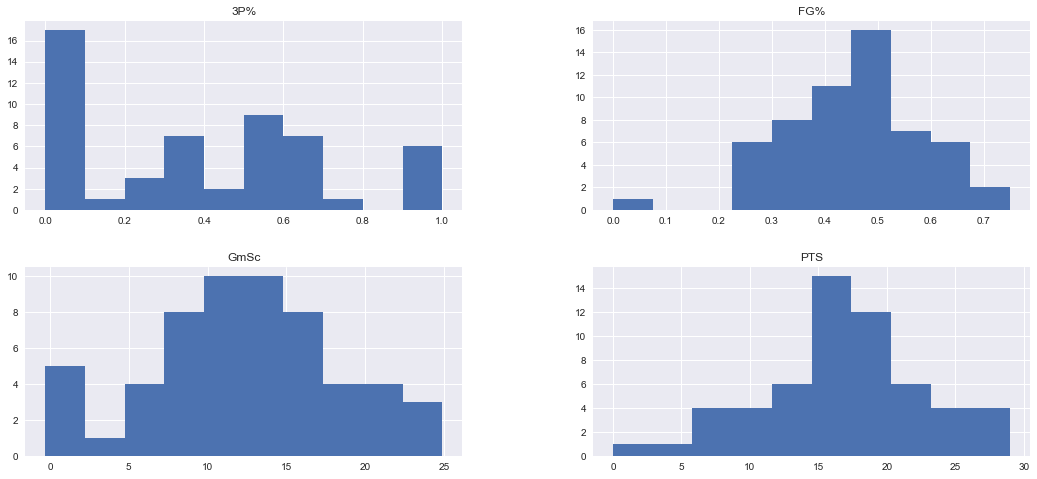

In [226]:
roy[['FG%', 'PTS', '3P%', 'GmSc']].hist()
plt.show()

## Before and After Birth Comparisons

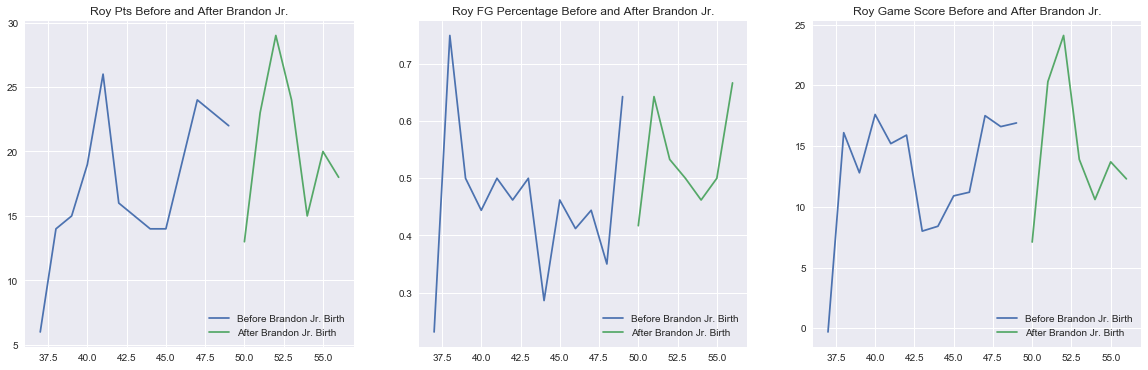

In [170]:
player_plots(final_roy, 'Roy', 'Brandon Jr.', 'G')

In [256]:
ttest_ind(final_roy[final_roy['time_since_birth'] > timedelta(days=0)]['PTS'],
          final_roy[final_roy['time_since_birth'] < timedelta(days=0)]['PTS'])

Ttest_indResult(statistic=-1.1032764181940422, pvalue=0.28443933229162094)

In [257]:
ttest_ind(final_roy[final_roy['time_since_birth'] > timedelta(days=0)]['FG%'],
          final_roy[final_roy['time_since_birth'] < timedelta(days=0)]['FG%'])

Ttest_indResult(statistic=-1.2419310303865199, pvalue=0.23020114655804275)

In [258]:
ttest_ind(final_roy[final_roy['time_since_birth'] > timedelta(days=0)]['GmSc'],
          final_roy[final_roy['time_since_birth'] < timedelta(days=0)]['GmSc'])

Ttest_indResult(statistic=-0.68791037121660126, pvalue=0.50027879874290537)

# Iguodala

## Season Averages

In [204]:
andre.describe()

,Rk,G,GS,FG,FGA,FG%,3P,3PA,3P%,FT,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,time_since_birth
count,76.000000,76.000000,76.0,76.000000,76.000000,76.000000,76.000000,76.000000,64.000000,76.000000,...,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76
mean,38.500000,38.500000,1.0,5.828947,13.039474,0.457382,0.631579,2.039474,0.285719,5.947368,...,5.710526,5.684211,2.000000,0.434211,3.434211,2.631579,18.236842,14.834211,-2.776316,65 days 04:06:18.947368
std,22.083176,22.083176,0.0,2.494731,4.509075,0.152364,0.876996,1.482707,0.347911,3.203726,...,2.512984,3.112172,1.505545,0.618289,1.691828,1.325062,6.517399,6.604494,13.364230,46 days 09:07:11.333287
min,1.000000,1.000000,1.0,1.000000,2.000000,0.111000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.500000,-40.000000,-21 days +00:00:00
25%,19.750000,19.750000,1.0,4.000000,10.000000,0.362250,0.000000,1.000000,0.000000,3.000000,...,4.000000,3.000000,1.000000,0.000000,2.000000,2.000000,13.000000,10.350000,-11.250000,25 days 12:00:00
50%,38.500000,38.500000,1.0,6.000000,12.500000,0.455000,0.000000,2.000000,0.200000,6.000000,...,5.000000,5.000000,2.000000,0.000000,3.000000,3.000000,19.000000,15.250000,-1.500000,67 days 00:00:00
75%,57.250000,57.250000,1.0,8.000000,16.250000,0.534250,1.000000,3.000000,0.500000,8.000000,...,7.000000,7.000000,3.000000,1.000000,5.000000,4.000000,23.000000,19.125000,7.000000,103 days 12:00:00
max,76.000000,76.000000,1.0,11.000000,23.000000,1.000000,4.000000,7.000000,1.000000,13.000000,...,16.000000,15.000000,5.000000,3.000000,7.000000,5.000000,34.000000,29.100000,23.000000,143 days 00:00:00


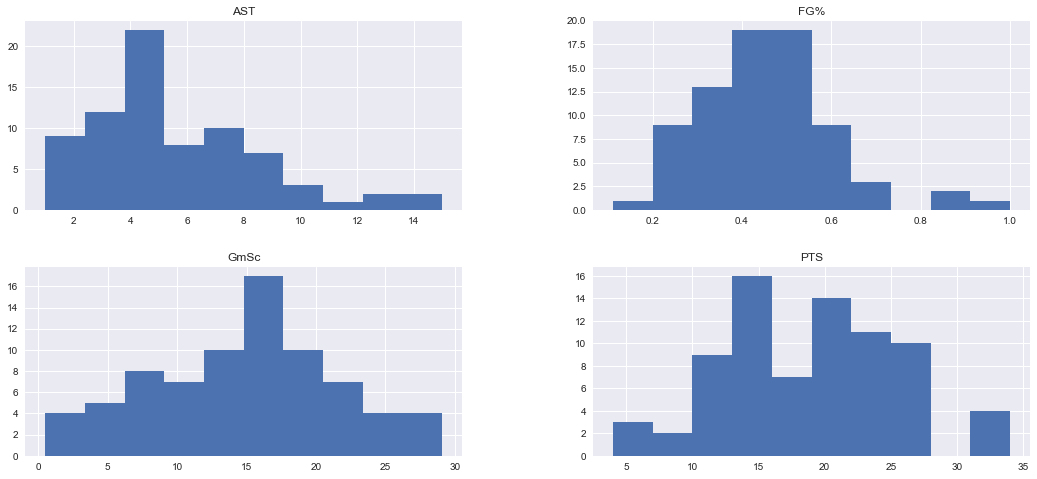

In [228]:
andre[['FG%', 'PTS', 'AST', 'GmSc']].hist()
plt.show()

## Before Birth

In [171]:
final_andre[final_andre['time_since_birth'] > timedelta(days=0)].describe()

,Rk,G,GS,FG,FGA,FG%,3P,3PA,3P%,FT,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,time_since_birth
count,14.0000,14.0000,14.0,14.000000,14.000000,14.000000,14.000000,14.000000,11.000000,14.000000,...,14.000000,14.000000,14.000000,14.00000,14.000000,14.000000,14.000000,14.000000,14.000000,14
mean,61.5000,61.5000,1.0,6.785714,15.000000,0.439571,0.642857,1.571429,0.371182,5.714286,...,6.142857,4.857143,2.214286,0.50000,4.000000,1.785714,19.928571,15.321429,-3.500000,16 days 17:08:34.285714
std,4.1833,4.1833,0.0,3.092884,4.350066,0.137826,0.928783,1.222500,0.436790,2.998168,...,2.537629,2.381245,1.805060,0.94054,1.617215,1.311404,7.600246,8.256762,16.667564,8 days 07:20:35.149273
min,55.0000,55.0000,1.0,2.000000,8.000000,0.200000,0.000000,0.000000,0.000000,0.000000,...,3.000000,1.000000,0.000000,0.00000,2.000000,0.000000,6.000000,0.500000,-40.000000,4 days 00:00:00
25%,58.2500,58.2500,1.0,4.000000,11.250000,0.366750,0.000000,1.000000,0.000000,3.250000,...,4.000000,3.000000,1.000000,0.00000,3.000000,1.000000,18.250000,14.475000,-17.500000,10 days 06:00:00
50%,61.5000,61.5000,1.0,7.500000,15.500000,0.455500,0.000000,1.500000,0.250000,6.000000,...,5.500000,5.000000,1.500000,0.00000,4.000000,1.500000,22.000000,16.150000,3.500000,16 days 00:00:00
75%,64.7500,64.7500,1.0,9.750000,17.750000,0.542000,1.000000,2.000000,0.750000,8.000000,...,8.000000,6.000000,4.000000,0.75000,5.000000,2.750000,24.750000,19.175000,7.000000,23 days 12:00:00
max,68.0000,68.0000,1.0,11.000000,23.000000,0.615000,3.000000,4.000000,1.000000,10.000000,...,11.000000,10.000000,5.000000,3.00000,7.000000,4.000000,31.000000,26.500000,18.000000,29 days 00:00:00


## After Birth

In [172]:
final_andre[final_andre['time_since_birth'] < timedelta(days=0)].describe()

,Rk,G,GS,FG,FGA,FG%,3P,3PA,3P%,FT,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,time_since_birth
count,7.000000,7.000000,7.0,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7
mean,73.000000,73.000000,1.0,6.142857,13.571429,0.452429,0.857143,2.285714,0.317333,6.714286,...,4.714286,7.857143,1.714286,0.571429,4.000000,2.428571,19.857143,16.528571,-1.571429,-11 days +00:00:00
std,2.160247,2.160247,0.0,2.115701,3.779645,0.100404,1.463850,2.288689,0.408100,4.111540,...,1.889822,4.375255,1.253566,0.534522,2.309401,1.618347,5.145502,7.047154,9.554356,5 days 21:59:09.293259
min,70.000000,70.000000,1.0,3.000000,11.000000,0.250000,0.000000,0.000000,0.000000,2.000000,...,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,13.000000,6.000000,-15.000000,-21 days +00:00:00
25%,71.500000,71.500000,1.0,5.500000,12.000000,0.436000,0.000000,1.000000,0.000000,3.500000,...,3.500000,5.500000,1.000000,0.000000,2.000000,1.500000,16.000000,11.900000,-8.500000,-14 days +00:00:00
50%,73.000000,73.000000,1.0,6.000000,12.000000,0.462000,0.000000,2.000000,0.166500,7.000000,...,5.000000,7.000000,1.000000,1.000000,5.000000,3.000000,20.000000,17.700000,-1.000000,-11 days +00:00:00
75%,74.500000,74.500000,1.0,6.500000,13.000000,0.519000,1.000000,2.500000,0.511500,9.000000,...,6.000000,10.000000,3.000000,1.000000,5.500000,3.000000,24.000000,21.750000,6.500000,-7 days +12:00:00
max,76.000000,76.000000,1.0,10.000000,22.000000,0.545000,4.000000,7.000000,1.000000,13.000000,...,7.000000,15.000000,3.000000,1.000000,7.000000,5.000000,26.000000,24.700000,9.000000,-4 days +00:00:00


## Before and After Birth Comparisons

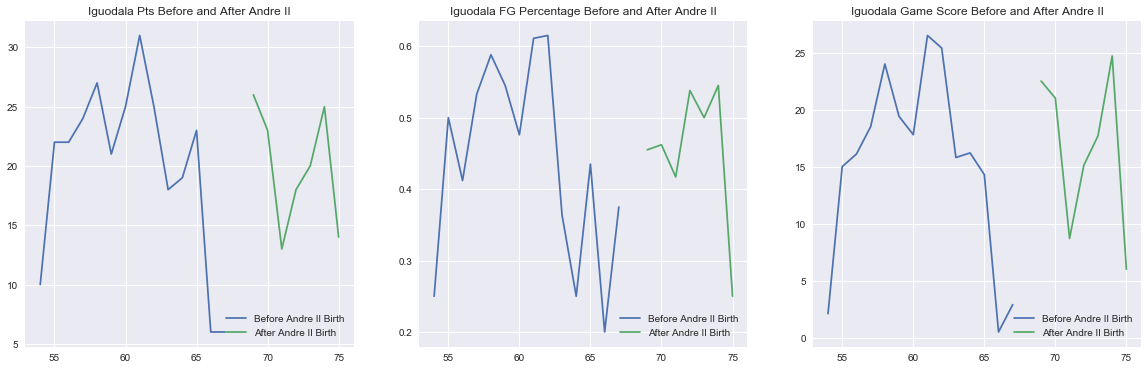

In [173]:
player_plots(final_andre, 'Iguodala', 'Andre II', 'G')

In [261]:
ttest_ind(final_andre[final_andre['time_since_birth'] > timedelta(days=0)]['PTS'],
          final_andre[final_andre['time_since_birth'] < timedelta(days=0)]['PTS'])

Ttest_indResult(statistic=0.022298856807991586, pvalue=0.98244208247706388)

In [262]:
ttest_ind(final_andre[final_andre['time_since_birth'] > timedelta(days=0)]['FG%'],
          final_andre[final_andre['time_since_birth'] < timedelta(days=0)]['FG%'])

Ttest_indResult(statistic=-0.21834805011899297, pvalue=0.8294860455915144)

In [263]:
ttest_ind(final_andre[final_andre['time_since_birth'] > timedelta(days=0)]['GmSc'],
          final_andre[final_andre['time_since_birth'] < timedelta(days=0)]['GmSc'])

Ttest_indResult(statistic=-0.33030822618877337, pvalue=0.74478144403815105)

# Horford

## Season Averages

In [206]:
stats = ['FG%','TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-']

horford[stats] = horford[stats].apply(pd.to_numeric, errors='coerce')
horford.describe()

,Rk,G,FG%,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,time_since_birth
count,82.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,82
mean,41.500000,38.500000,0.556882,7.157895,3.210526,0.894737,1.289474,1.315789,1.592105,15.210526,13.803947,3.750000,32 days 16:40:58.536585
std,23.815261,22.083176,0.173231,3.089995,1.683772,1.014284,1.030415,1.073443,1.190828,5.269575,5.921654,13.130245,49 days 06:17:06.643516
min,1.000000,1.000000,0.182000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,-0.700000,-23.000000,-51 days +00:00:00
25%,21.250000,19.750000,0.417000,5.000000,2.000000,0.000000,0.750000,0.750000,1.000000,11.750000,10.100000,-7.000000,-12 days +06:00:00
50%,41.500000,38.500000,0.553000,7.000000,3.000000,1.000000,1.000000,1.000000,1.000000,15.000000,13.000000,6.000000,36 days 00:00:00
75%,61.750000,57.250000,0.689000,9.000000,4.000000,1.000000,2.000000,2.000000,2.000000,19.250000,17.650000,14.000000,74 days 12:00:00
max,82.000000,76.000000,1.000000,16.000000,10.000000,5.000000,4.000000,5.000000,5.000000,28.000000,25.900000,31.000000,117 days 00:00:00


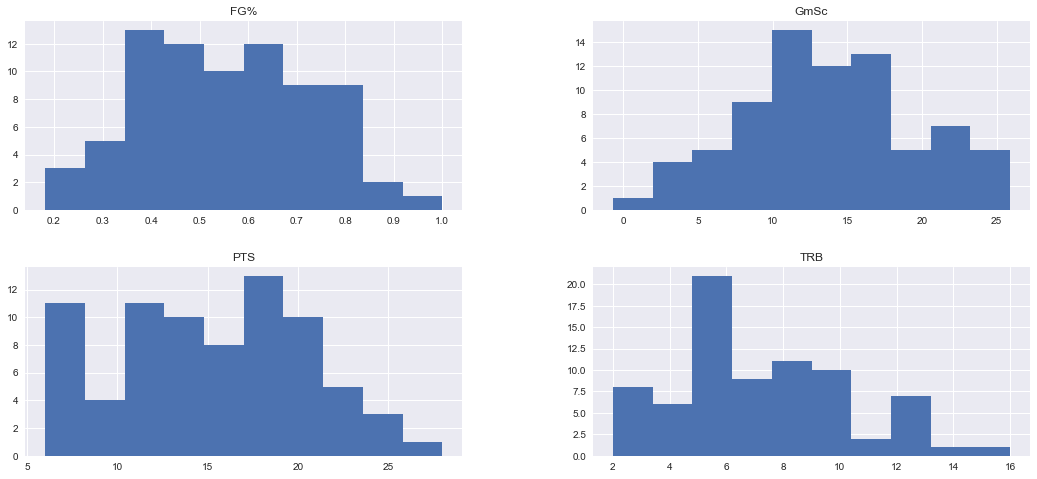

In [229]:
horford[['FG%', 'PTS', 'TRB', 'GmSc']].hist()
plt.show()

## Before Birth

In [187]:
final_horford[stats] = final_horford[stats].apply(pd.to_numeric, errors='coerce')
final_horford[final_horford['time_since_birth'] > timedelta(days=0)].describe()

,Rk,G,FG%,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,time_since_birth
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.00,12.000000,12.00000,12
mean,50.500000,48.500000,0.529417,10.250000,3.500000,0.916667,1.083333,1.833333,1.666667,16.50,15.675000,1.50000,17 days 00:00:00
std,3.605551,3.605551,0.202832,2.454125,1.381699,1.083625,1.083625,1.029857,1.497473,7.00,7.213135,12.23631,8 days 15:12:55.090980
min,45.000000,43.000000,0.182000,6.000000,1.000000,0.000000,0.000000,1.000000,0.000000,6.00,-0.700000,-22.00000,1 days 00:00:00
25%,47.750000,45.750000,0.412750,8.000000,2.750000,0.000000,0.000000,1.000000,0.750000,11.00,11.775000,-9.25000,13 days 12:00:00
50%,50.500000,48.500000,0.488500,10.500000,4.000000,1.000000,1.000000,1.500000,1.500000,18.00,17.450000,3.00000,18 days 00:00:00
75%,53.250000,51.250000,0.652000,12.000000,4.000000,1.000000,2.000000,2.250000,2.250000,21.25,21.350000,11.75000,23 days 06:00:00
max,56.000000,54.000000,0.889000,14.000000,6.000000,3.000000,3.000000,4.000000,5.000000,28.00,24.100000,17.00000,29 days 00:00:00


## After Birth

In [188]:
final_horford[final_horford['time_since_birth'] < timedelta(days=0)].describe()

,Rk,G,FG%,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,time_since_birth
count,13.000000,13.00000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13
mean,64.153846,61.00000,0.493769,6.769231,3.307692,1.461538,1.076923,1.230769,1.384615,13.076923,11.946154,-0.384615,-17 days +20:18:27.692307
std,4.524860,3.89444,0.172644,3.004270,1.702186,1.391365,1.187542,0.926809,1.192928,4.906824,6.365613,15.866834,8 days 17:39:00.929570
min,57.000000,55.00000,0.222000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,3.400000,-23.000000,-30 days +00:00:00
25%,61.000000,58.00000,0.375000,5.000000,2.000000,0.000000,0.000000,1.000000,1.000000,10.000000,6.900000,-13.000000,-23 days +00:00:00
50%,64.000000,61.00000,0.455000,6.000000,3.000000,2.000000,1.000000,1.000000,1.000000,12.000000,11.900000,8.000000,-16 days +00:00:00
75%,68.000000,64.00000,0.643000,8.000000,4.000000,2.000000,1.000000,2.000000,2.000000,18.000000,16.600000,14.000000,-11 days +00:00:00
max,71.000000,67.00000,0.778000,13.000000,6.000000,5.000000,3.000000,3.000000,4.000000,21.000000,22.400000,17.000000,-2 days +00:00:00


## Before and After Birth Comparison

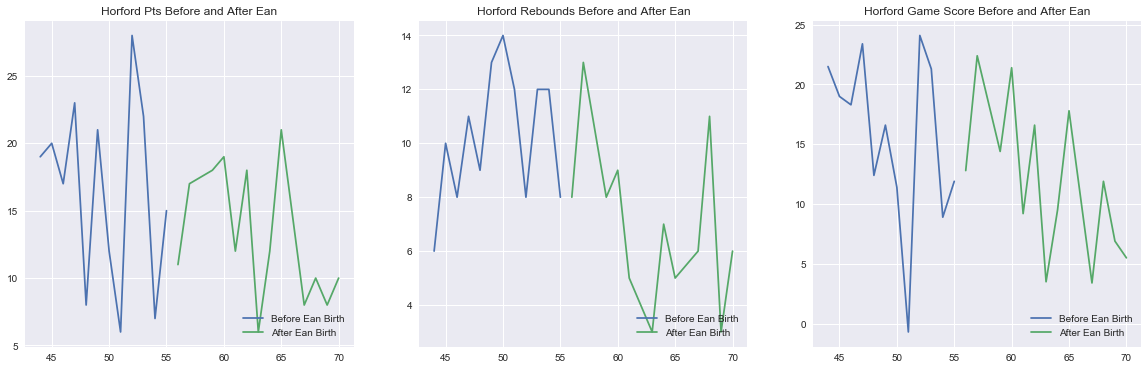

In [189]:
player_plots(final_horford, 'Horford', 'Ean', 'F')

In [264]:
ttest_ind(final_horford[final_horford['time_since_birth'] > timedelta(days=0)]['PTS'],
          final_horford[final_horford['time_since_birth'] < timedelta(days=0)]['PTS'])

Ttest_indResult(statistic=1.4252067728728772, pvalue=0.1675276081467158)

In [265]:
ttest_ind(final_horford[final_horford['time_since_birth'] > timedelta(days=0)]['TRB'],
          final_horford[final_horford['time_since_birth'] < timedelta(days=0)]['TRB'])

Ttest_indResult(statistic=3.1561813422897762, pvalue=0.0044170151798849696)

In [266]:
ttest_ind(final_horford[final_horford['time_since_birth'] > timedelta(days=0)]['GmSc'],
          final_horford[final_horford['time_since_birth'] < timedelta(days=0)]['GmSc'])

Ttest_indResult(statistic=1.3729979890311703, pvalue=0.1829921658494181)

# Dirk

## Season Averages

In [207]:
dirk[stats] = dirk[stats].apply(pd.to_numeric, errors='coerce')
dirk.describe()

,Rk,G,FG%,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,time_since_birth
count,82.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,82
mean,41.500000,39.000000,0.468273,5.935065,1.857143,0.506494,0.428571,1.064935,2.077922,17.311688,12.229870,3.116883,63 days 19:54:08.780487
std,23.815261,22.371857,0.141700,2.472681,1.644083,0.641203,0.677235,0.950591,1.374258,5.316953,5.479245,13.487786,49 days 22:25:38.794661
min,1.000000,1.000000,0.200000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.800000,-24.000000,-23 days +00:00:00
25%,21.250000,20.000000,0.368000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000,14.000000,8.000000,-7.000000,21 days 12:00:00
50%,41.500000,39.000000,0.455000,6.000000,2.000000,0.000000,0.000000,1.000000,2.000000,16.000000,11.700000,4.000000,64 days 12:00:00
75%,61.750000,58.000000,0.579000,7.000000,3.000000,1.000000,1.000000,2.000000,3.000000,21.000000,16.300000,14.000000,107 days 12:00:00
max,82.000000,77.000000,0.875000,14.000000,10.000000,3.000000,3.000000,4.000000,6.000000,30.000000,26.400000,33.000000,146 days 00:00:00


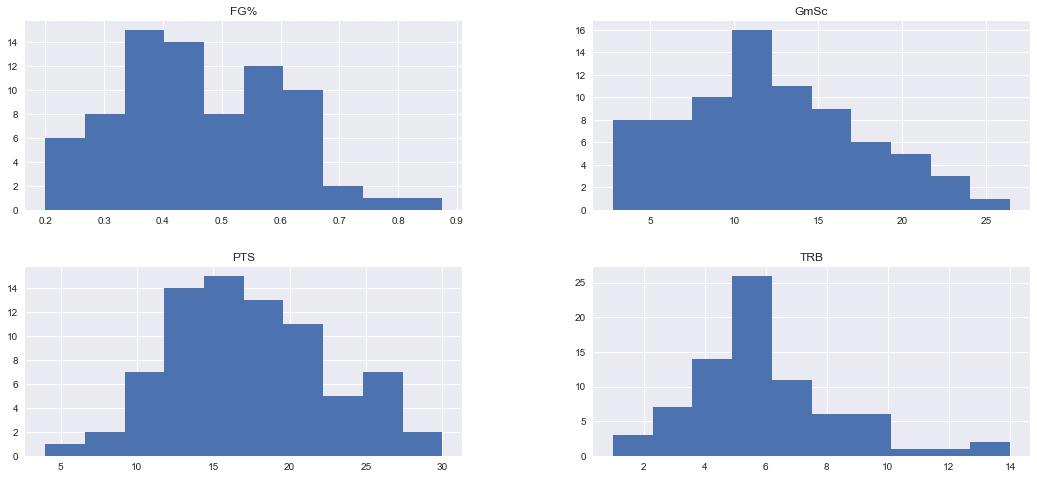

In [231]:
dirk[['FG%', 'PTS', 'TRB', 'GmSc']].hist()
plt.show()

## Before Birth

In [192]:
final_dirk[stats] = final_dirk[stats].apply(pd.to_numeric, errors='coerce')
final_dirk[final_dirk['time_since_birth'] > timedelta(days=0)].describe()

,Rk,G,FG%,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,time_since_birth
count,14.0000,14.0000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14
mean,64.5000,60.5000,0.418643,5.714286,1.571429,0.571429,0.214286,0.500000,2.428571,14.357143,9.792857,-3.857143,15 days 08:34:17.142857
std,4.1833,4.1833,0.105942,2.920184,1.283881,0.646206,0.578934,0.650444,1.650841,5.583039,5.013438,16.237929,9 days 05:17:25.874144
min,58.0000,54.0000,0.286000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.900000,-24.000000,1 days 00:00:00
25%,61.2500,57.2500,0.331000,4.000000,1.000000,0.000000,0.000000,0.000000,1.250000,11.250000,6.925000,-19.000000,7 days 18:00:00
50%,64.5000,60.5000,0.403000,5.500000,1.500000,0.500000,0.000000,0.000000,2.500000,14.000000,9.250000,-4.000000,16 days 00:00:00
75%,67.7500,63.7500,0.486000,7.750000,2.000000,1.000000,0.000000,1.000000,3.000000,17.500000,11.900000,5.000000,22 days 12:00:00
max,71.0000,67.0000,0.600000,12.000000,4.000000,2.000000,2.000000,2.000000,6.000000,25.000000,20.500000,30.000000,29 days 00:00:00


## After Birth

In [193]:
final_dirk[final_dirk['time_since_birth'] < timedelta(days=0)].describe()

,Rk,G,FG%,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,time_since_birth
count,10.000000,10.00000,10.00000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10
mean,76.600000,72.50000,0.48030,6.00000,1.800000,0.400000,0.500000,1.500000,2.300000,17.40000,12.080000,6.400000,-12 days +02:24:00
std,3.204164,3.02765,0.10145,2.94392,1.619328,0.516398,0.971825,0.527046,1.159502,4.64758,4.786741,10.079683,7 days 05:36:06.635909
min,72.000000,68.00000,0.33300,4.00000,0.000000,0.000000,0.000000,1.000000,1.000000,7.00000,3.900000,-7.000000,-23 days +00:00:00
25%,74.250000,70.25000,0.39800,4.00000,0.250000,0.000000,0.000000,1.000000,1.250000,16.00000,10.725000,-3.000000,-18 days +12:00:00
50%,76.500000,72.50000,0.48550,5.00000,1.500000,0.000000,0.000000,1.500000,2.000000,18.00000,11.300000,7.500000,-11 days +00:00:00
75%,78.750000,74.75000,0.53500,6.50000,3.000000,1.000000,0.750000,2.000000,3.000000,19.00000,13.650000,15.750000,-7 days +06:00:00
max,82.000000,77.00000,0.63600,13.00000,4.000000,1.000000,3.000000,2.000000,4.000000,25.00000,21.500000,18.000000,-1 days +00:00:00


## Before and After Birth Comparison

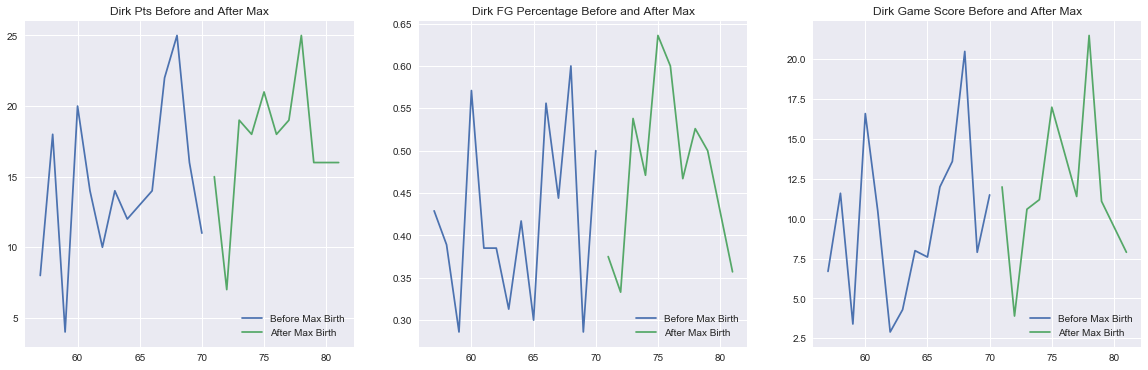

In [208]:
player_plots(final_dirk, 'Dirk', 'Max', 'G')

In [236]:
ttest_ind(final_dirk[final_dirk['time_since_birth'] > timedelta(days=0)]['PTS'],
          final_dirk[final_dirk['time_since_birth'] < timedelta(days=0)]['PTS'])

Ttest_indResult(statistic=-1.4077168698963807, pvalue=0.17318847652839667)

In [267]:
ttest_ind(final_dirk[final_dirk['time_since_birth'] > timedelta(days=0)]['FG%'],
          final_dirk[final_dirk['time_since_birth'] < timedelta(days=0)]['FG%'])

Ttest_indResult(statistic=-1.4301282014084957, pvalue=0.16672985514820785)

In [268]:
ttest_ind(final_dirk[final_dirk['time_since_birth'] > timedelta(days=0)]['GmSc'],
          final_dirk[final_dirk['time_since_birth'] < timedelta(days=0)]['GmSc'])

Ttest_indResult(statistic=-1.122311900591852, pvalue=0.27382979405108065)

## Packaged Model

Below is an example of this model that can be applied to other players that have a had birth of child during the NBA season - the function takes in a csv file downloaded from basketball-reference.com, the date of birth of the player's child, and the player's position (F or G).

In [272]:
def is_event_significant(file, birth_date, position):
    
    df = pd.read_csv(file)
    
    df['Date'] = pd.to_datetime(df['Date']) # convert date column to datetime
    df['time_since_birth'] = datetime.strptime(birth_date, '%m/%d/%Y') - pd.to_datetime(df['Date']) # calculate time since birth
    final_df = df[(df['time_since_birth'] <= timedelta(days=30)) &  # Only include month before and after birth
                  (df['time_since_birth'] >= timedelta(days=-30))] 
    final_df = final_df[final_df['G'].notnull()] # remove DNPs
    
    stats = ['FG%', 'PTS', 'TRB', 'GmSc']
    final_df[stats] = final_df[stats].apply(pd.to_numeric, errors='coerce')
    
    pts_pvalue = ttest_ind(final_df[final_df['time_since_birth'] > timedelta(days=0)]['PTS'],
                           final_df[final_df['time_since_birth'] < timedelta(days=0)]['PTS'])[1]
    gs_pvalue = ttest_ind(final_df[final_df['time_since_birth'] > timedelta(days=0)]['GmSc'],
                          final_df[final_df['time_since_birth'] < timedelta(days=0)]['GmSc'])[1]
    
    if position == 'F':
        rb_pvalue = ttest_ind(final_df[final_df['time_since_birth'] > timedelta(days=0)]['TRB'],
                              final_df[final_df['time_since_birth'] < timedelta(days=0)]['TRB'])[1]
        if rb_pvalue < 0.05:
            print('Significant Difference in Rebounds After Birth of Child')
        else:
            print('Insignificant Difference in Rebounds After Birth of Child')
        
    if position == 'G':
        fg_pvalue = ttest_ind(final_df[final_df['time_since_birth'] > timedelta(days=0)]['FG%'],
                              final_df[final_df['time_since_birth'] < timedelta(days=0)]['FG%'])[1]
        if fg_pvalue < 0.05:
            print('Significant Difference in FG% After Birth of Child')
        else:
            print('Insignificant Difference in FG% After Birth of Child')

    if pts_pvalue < 0.05:
        print('Significant Difference in Points After Birth of Child')
    else:
        print('Insignificant Difference in Points After Birth of Child')
        
    if gs_pvalue < 0.05:
        print('Significant Difference in Game Score After Birth of Child')
    else:
        print('Insignificant Difference in Game Score After Birth of Child')

In [274]:
is_event_significant(file='d_howard.csv', birth_date=howard_birth, position='F')

Insignificant Difference in Rebounds After Birth of Child
Insignificant Difference in Points After Birth of Child
Insignificant Difference in Game Score After Birth of Child


In [275]:
is_event_significant(file='a_horford.csv', birth_date=horford_birth, position='F')

Significant Difference in Rebounds After Birth of Child
Insignificant Difference in Points After Birth of Child
Insignificant Difference in Game Score After Birth of Child


In [276]:
is_event_significant(file='k_bryant.csv', birth_date=kobe_birth, position='G')

Insignificant Difference in FG% After Birth of Child
Insignificant Difference in Points After Birth of Child
Insignificant Difference in Game Score After Birth of Child


# Conclusion and Future Directions

From this analysis it appears that the birth of a child do not appear to significantly affect a player's statistical performance with only 1 out of 30 different events showing significance.

Future Directions and Analysis:
- Need more examples of players who have had births within the desired timeframe - difficult to find but possible with more deeper dive into google
- Observe whether or not there is a difference between older and younger players, players who are married/engaged, players who left to attend the child's birth, what number child this (first child, second), etc.
- Observe impact of other life events (engagement, family death, etc.)